In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from scipy import stats

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10, 6)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)
pd.set_option('display.max_columns', None)


In [4]:
df_origin = pd.read_csv("filled_scout.csv")
df = df_origin.copy()
df.head()

,make_model,body_type,price,km,prev_owner,body_color,paint_type,number_of_doors,number_of_seats,gearing_type,displacement_cc,Cylinders,drive_chain,Fuel,co2_emission,comfort_convenience,entertainment_media,Extras,safety_security,Gears,age,hp_kw,Type_,upholstery_type,upholstery_color,Consumption_comb,Consumption_city,Consumption_country,insp_new,Weight_kg
0,Audi A1,Sedans,15770.0,56013.0,2.0,Black,Metallic,5.0,5.0,Automatic,1400.0,3.0,front,Diesel,99.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",5.0,3.0,66.0,Used,Cloth,Black,3.8,3.5,3.5,Yes,1220.0
1,Audi A1,Sedans,14500.0,80000.0,1.0,Red,Metallic,3.0,4.0,Automatic,1800.0,4.0,front,Benzine,129.0,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",7.0,2.0,141.0,Used,Cloth,Grey,5.6,4.7,4.7,No,1255.0
2,Audi A1,Sedans,14640.0,83450.0,1.0,Black,Metallic,4.0,4.0,Automatic,1600.0,4.0,front,Diesel,99.0,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",5.0,3.0,85.0,Used,Cloth,Black,3.8,3.4,3.4,No,1135.0
3,Audi A1,Sedans,14500.0,73000.0,1.0,Brown,Metallic,3.0,4.0,Automatic,1400.0,3.0,front,Diesel,99.0,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",6.0,3.0,66.0,Used,Cloth,Black,3.8,3.5,3.5,No,1195.0
4,Audi A1,Sedans,16790.0,16200.0,1.0,Black,Metallic,5.0,5.0,Automatic,1400.0,3.0,front,Diesel,109.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",5.0,3.0,66.0,Used,Cloth,Black,4.1,3.8,3.8,Yes,1135.0


In [5]:
df.sample(8)

,make_model,body_type,price,km,prev_owner,body_color,paint_type,number_of_doors,number_of_seats,gearing_type,displacement_cc,Cylinders,drive_chain,Fuel,co2_emission,comfort_convenience,entertainment_media,Extras,safety_security,Gears,age,hp_kw,Type_,upholstery_type,upholstery_color,Consumption_comb,Consumption_city,Consumption_country,insp_new,Weight_kg
4896,Audi A3,Sedans,20500.0,14999.0,1.0,Grey,Metallic,4.0,5.0,Manual,1600.0,4.0,front,Diesel,107.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,On-board computer,Radio","Alloy wheels,Sport suspension,Voice Control","ABS,Driver-side airbag,Electronic stability co...",6.0,0.0,85.0,Used,Full leather,Black,4.0,3.5,3.5,Yes,1265.0
6946,Opel Astra,Station wagon,11900.0,70090.0,1.0,Black,Metallic,5.0,5.0,Manual,1600.0,4.0,front,Diesel,101.0,"Air conditioning,Automatic climate control,Cru...","Bluetooth,CD player,On-board computer,Radio,USB",Roof rack,"Central door lock,Driver-side airbag,Electroni...",6.0,2.0,1.0,Used,Cloth,Black,4.5,3.8,3.8,No,1425.0
11587,Opel Insignia,Station wagon,18599.0,28850.0,1.0,Silver,Metallic,5.0,5.0,Manual,2000.0,4.0,front,Diesel,148.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Catalytic Converter,Roof rack,Ski...","ABS,Adaptive Cruise Control,Adaptive headlight...",6.0,2.0,125.0,Used,Cloth,Black,5.6,4.7,4.7,No,1633.0
6270,Opel Astra,Station wagon,8480.0,155871.0,1.0,Black,Metallic,4.0,5.0,Manual,1600.0,4.0,front,Diesel,101.0,"Air conditioning,Cruise control,Electrical sid...","Bluetooth,On-board computer,Radio",Roof rack,"ABS,Central door lock,Driver-side airbag,Immob...",6.0,2.0,81.0,Used,Cloth,Grey,4.5,3.8,3.8,No,1425.0
8043,Opel Astra,Sedans,15500.0,4999.0,1.0,Red,Metallic,5.0,5.0,Manual,1000.0,3.0,front,Benzine,111.0,"Air conditioning,Cruise control,Electrical sid...","Bluetooth,Digital radio,Hands-free equipment,M...",Alloy wheels,"ABS,Central door lock,Daytime running lights,D...",5.0,0.0,66.0,Used,Cloth,Black,4.7,4.2,4.2,Yes,1273.0
5704,Audi A3,Sedans,24990.0,250.0,1.0,Black,Metallic,4.0,5.0,Manual,1000.0,3.0,front,Benzine,117.0,"Air conditioning,Armrest,Automatic climate con...","CD player,Hands-free equipment,On-board computer",Alloy wheels,"ABS,Electronic stability control,Fog lights,He...",6.0,0.0,85.0,Used,Cloth,Black,5.1,3.8,3.8,Yes,1256.0
2207,Audi A1,Sedans,21500.0,100.0,1.0,Green,Metallic,5.0,5.0,Manual,1000.0,3.0,front,Benzine,104.0,"Air conditioning,Power windows",Radio,Alloy wheels,"ABS,Central door lock,Driver-side airbag,Elect...",5.0,0.0,70.0,Employee's car,Cloth,Grey,4.6,3.9,3.9,Yes,1165.0
6554,Opel Astra,Sedans,10990.0,3898.0,1.0,Silver,Metallic,4.0,5.0,Manual,1400.0,4.0,front,Benzine,128.0,"Air conditioning,Electrical side mirrors,Hill ...","Bluetooth,Hands-free equipment,On-board comput...",Alloy wheels,"ABS,Central door lock,Daytime running lights,D...",6.0,2.0,74.0,Used,Cloth,Black,5.4,4.3,4.3,No,1273.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15919 non-null  object 
 1   body_type            15919 non-null  object 
 2   price                15919 non-null  float64
 3   km                   15919 non-null  float64
 4   prev_owner           15919 non-null  float64
 5   body_color           15919 non-null  object 
 6   paint_type           15919 non-null  object 
 7   number_of_doors      15919 non-null  float64
 8   number_of_seats      15919 non-null  float64
 9   gearing_type         15919 non-null  object 
 10  displacement_cc      15919 non-null  float64
 11  Cylinders            15919 non-null  float64
 12  drive_chain          15919 non-null  object 
 13  Fuel                 15919 non-null  object 
 14  co2_emission         15919 non-null  float64
 15  comfort_convenience  15919 non-null 

In [7]:
df["make_model"].value_counts(dropna=False)

Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2526
Opel Corsa        2219
Renault Clio      1839
Renault Espace     991
Renault Duster      34
Audi A2              1
Name: make_model, dtype: int64

In [8]:
df["body_type"].value_counts(dropna=False)

Sedans           8005
Station wagon    3678
Compact          3242
Van               817
Transporter        88
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64

In [9]:
df.shape

(15919, 30)

In [10]:
## df.select_dtypes(include="number")  # bunu yazarak alabiliriz ; Ama NUMERIC OLMASINA RAĞMEN KATEGORİK OLAN SÜTUNLAR VAR
                                        # NR.OF.DOORS , AGE VS

In [11]:
def grab_col_names(dataframe,categ_th=13,cardi_th=25):        # threshold:eşik
    """
    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
    not : Kategorik değişkenlerin içerisine numeric görünümlü kategorik değişkenler de dahildir.

    Parameters
    ----------
    dataframe: dataframe
        değişken isimleri alınmak istenen dataframe'dir.
    cat_th: int, float
        numerik fakat kategorik olan değişkenler için sınıf eşik değeri
    car_th: int, float
        kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    -------
    categ_cols: list
            Kategorik değişken listesi
    num_cols: list
            Numerik değişken listesi
    categ_but_cardi: list
            Kategorik görünümlü kardinal değişken listesi

    Notes
    ------
    categ_cols + num_cols + categ_but_cardi = toplam değişken sayısı
    num_but_categ; categ_cols'un içerisinde."""
    
    # categ_cols , categ_but_cardi
    categ_cols = [col for col in df.columns if  str(df[col].dtypes) in ["category","object","bool"]]
    num_but_categ = [col for col in df.columns if df[col].nunique() < categ_th  and str(df[col].dtypes) in ["int64","float64"]]
    categ_but_cardi = [col for col in df.columns if df[col].nunique() > cardi_th and  str(df[col].dtypes) in ["category","object"]]
    
    
    categ_cols =  categ_cols  +  num_but_categ
    categ_cols = [col for col in categ_cols if col not in categ_but_cardi]   ### cat_but_cardi'nin içinde olmayanları al diyoruz yani.
    
    
    
    # numeric:
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_categ]
    
    
    # rapor
    
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'categ_cols: {len(categ_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'categ_but_cardi: {len(categ_but_cardi)}')
    print(f'num_but_cat: {len(num_but_categ)}')
    
    
    return categ_cols, num_cols, categ_but_cardi
    

In [12]:
cat_cols , num_cols,categ_but_car = grab_col_names(df)

Observations: 15919
Variables: 30
categ_cols: 17
num_cols: 9
categ_but_cardi: 4
num_but_cat: 6


In [13]:
categ_but_car

['comfort_convenience', 'entertainment_media', 'Extras', 'safety_security']

In [14]:
df["comfort_convenience"]

0        Air conditioning,Armrest,Automatic climate con...
1        Air conditioning,Automatic climate control,Hil...
2        Air conditioning,Cruise control,Electrical sid...
3        Air suspension,Armrest,Auxiliary heating,Elect...
4        Air conditioning,Armrest,Automatic climate con...
                               ...                        
15914    Air conditioning,Automatic climate control,Cru...
15915    Air conditioning,Automatic climate control,Cru...
15916    Air conditioning,Armrest,Automatic climate con...
15917    Air conditioning,Automatic climate control,Cru...
15918    Air conditioning,Automatic climate control,Cru...
Name: comfort_convenience, Length: 15919, dtype: object

In [15]:
df["entertainment_media"]

0        Bluetooth,Hands-free equipment,On-board comput...
1        Bluetooth,Hands-free equipment,On-board comput...
2                                    MP3,On-board computer
3        Bluetooth,CD player,Hands-free equipment,MP3,O...
4        Bluetooth,CD player,Hands-free equipment,MP3,O...
                               ...                        
15914    Bluetooth,Digital radio,Hands-free equipment,O...
15915    Bluetooth,Digital radio,Hands-free equipment,R...
15916    Bluetooth,Hands-free equipment,On-board comput...
15917                    Bluetooth,Digital radio,Radio,USB
15918                                                  USB
Name: entertainment_media, Length: 15919, dtype: object

In [16]:
num_cols

['price',
 'km',
 'displacement_cc',
 'co2_emission',
 'hp_kw',
 'Consumption_comb',
 'Consumption_city',
 'Consumption_country',
 'Weight_kg']

In [17]:
q1 = df["km"].quantile(q=0.25)
q3 = df["km"].quantile(q=0.75)
iqr = q3 - q1

In [18]:
q1

3300.0

In [19]:
q3

47000.0

In [20]:
up = q3 + 1.5 * iqr
low = q1 - 1.5 * iqr

In [21]:
low,up

(-62250.0, 112550.0)

In [22]:
df["km"].min()  ## mesela km sütunumda alt tarafta outlier olamaz bu durumda.

0.0

In [23]:
df["km"].max()  ## bu mesela bir extreme değer.

317000.0

In [24]:
## 

In [25]:
df[(df["km"] < low ) | (df["km"] > up)].sort_values(by="km")                             ## 715 tane outlier var gibi duruyor.

,make_model,body_type,price,km,prev_owner,body_color,paint_type,number_of_doors,number_of_seats,gearing_type,displacement_cc,Cylinders,drive_chain,Fuel,co2_emission,comfort_convenience,entertainment_media,Extras,safety_security,Gears,age,hp_kw,Type_,upholstery_type,upholstery_color,Consumption_comb,Consumption_city,Consumption_country,insp_new,Weight_kg
4352,Audi A3,Sedans,16690.0,112700.0,1.0,Black,Metallic,4.0,5.0,Manual,1600.0,4.0,front,Diesel,107.0,"Air conditioning,Automatic climate control,Ele...","Bluetooth,CD player,Hands-free equipment,On-bo...","Alloy wheels,Sport package,Sport seats,Trailer...","ABS,Central door lock,Central door lock with r...",6.0,2.0,81.0,Used,Cloth,Black,4.0,3.6,3.6,Yes,1360.0
3194,Audi A3,Sedans,14890.0,112750.0,1.0,Blue,Metallic,4.0,5.0,Manual,1600.0,4.0,front,Diesel,106.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board computer","Alloy wheels,Sport seats,Sport suspension","ABS,Central door lock,Driver-side airbag,Elect...",6.0,3.0,81.0,Used,Cloth,Black,4.0,3.6,3.6,No,1360.0
10600,Opel Insignia,Sedans,15400.0,112789.0,1.0,Black,Metallic,4.0,5.0,Automatic,2000.0,4.0,front,Diesel,147.0,"Air conditioning,Automatic climate control,Pow...",On-board computer,Alloy wheels,"ABS,Driver-side airbag,Electronic stability co...",6.0,2.0,125.0,Employee's car,Cloth,Black,5.6,4.5,4.5,No,2300.0
11238,Opel Insignia,Station wagon,18479.0,112895.0,1.0,White,Metallic,5.0,5.0,Automatic,2000.0,4.0,front,Diesel,146.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Roof rack,Shift paddles","ABS,Adaptive Cruise Control,Adaptive headlight...",6.0,2.0,125.0,Used,Full leather,Black,5.5,4.2,4.2,Yes,1487.0
11026,Opel Insignia,Station wagon,12980.0,112936.0,1.0,Black,Metallic,4.0,5.0,Manual,2000.0,4.0,front,Diesel,135.0,"Air conditioning,Automatic climate control,Cru...","Bluetooth,CD player,On-board computer","Alloy wheels,Roof rack,Sport seats,Trailer hitch","ABS,Adaptive headlights,Central door lock,Dayt...",6.0,3.0,125.0,Used,Full leather,Grey,5.6,4.6,4.6,No,1487.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15277,Renault Espace,Van,14600.0,240000.0,1.0,White,Metallic,5.0,5.0,Automatic,1600.0,4.0,front,Diesel,120.0,"Air conditioning,Automatic climate control,Cru...",Sound system,Alloy wheels,"ABS,Central door lock with remote control,Driv...",6.0,2.0,118.0,Used,Full leather,Black,4.6,4.4,4.4,No,1659.0
6224,Opel Astra,Station wagon,9800.0,248000.0,1.0,White,Metallic,4.0,4.0,Manual,1700.0,4.0,front,Diesel,120.0,"Air conditioning,Armrest,Electrical side mirro...","Bluetooth,CD player,Hands-free equipment,MP3,O...",Touch screen,"ABS,Alarm system,Central door lock,Electronic ...",6.0,3.0,81.0,Used,Cloth,Black,4.5,4.0,4.0,No,1523.0
5712,Opel Astra,Station wagon,6000.0,260000.0,1.0,Silver,Metallic,5.0,5.0,Automatic,1600.0,4.0,front,Diesel,119.0,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Roof rack,Touch screen,Trailer hi...","ABS,Central door lock,Central door lock with r...",6.0,3.0,100.0,Used,Cloth,Black,4.5,3.8,3.8,No,1425.0
3003,Audi A3,Sedans,14980.0,291800.0,1.0,Blue,Metallic,4.0,5.0,Manual,2000.0,4.0,4WD,Diesel,125.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,On-bo...","Alloy wheels,Sport package,Sport seats,Sport s...","ABS,Adaptive headlights,Central door lock,Dayt...",6.0,3.0,110.0,Used,Cloth,Black,4.7,4.1,4.1,No,1360.0


In [26]:
df[(df["km"] < low ) | (df["km"] > up)].index
## ileride bunu kullanabiliriz .kulaklarından tuttuk getirdik.

Int64Index([   25,    34,    61,    63,    64,   328,   369,   397,   443,
              465,
            ...
            15283, 15284, 15314, 15316, 15320, 15386, 15412, 15413, 15416,
            15420],
           dtype='int64', length=715)

In [27]:
df[(df["km"] < low ) | (df["km"] > up)].any(axis=None)

## any() -----> bu sorgu extreme değerleri getirecek bize herhangi bir extreme değer var mı diyoruz ; 
## axis = None ---> satır veya sütuna değil de hepsine bakmak istiyorum.
## bool döndüğüne dikkat edelim.

True

In [28]:
df[~((df["km"] < low ) | (df["km"] > up))]

,make_model,body_type,price,km,prev_owner,body_color,paint_type,number_of_doors,number_of_seats,gearing_type,displacement_cc,Cylinders,drive_chain,Fuel,co2_emission,comfort_convenience,entertainment_media,Extras,safety_security,Gears,age,hp_kw,Type_,upholstery_type,upholstery_color,Consumption_comb,Consumption_city,Consumption_country,insp_new,Weight_kg
0,Audi A1,Sedans,15770.0,56013.000000,2.0,Black,Metallic,5.0,5.0,Automatic,1400.0,3.0,front,Diesel,99.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",5.0,3.0,66.0,Used,Cloth,Black,3.8,3.5,3.5,Yes,1220.0
1,Audi A1,Sedans,14500.0,80000.000000,1.0,Red,Metallic,3.0,4.0,Automatic,1800.0,4.0,front,Benzine,129.0,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",7.0,2.0,141.0,Used,Cloth,Grey,5.6,4.7,4.7,No,1255.0
2,Audi A1,Sedans,14640.0,83450.000000,1.0,Black,Metallic,4.0,4.0,Automatic,1600.0,4.0,front,Diesel,99.0,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",5.0,3.0,85.0,Used,Cloth,Black,3.8,3.4,3.4,No,1135.0
3,Audi A1,Sedans,14500.0,73000.000000,1.0,Brown,Metallic,3.0,4.0,Automatic,1400.0,3.0,front,Diesel,99.0,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",6.0,3.0,66.0,Used,Cloth,Black,3.8,3.5,3.5,No,1195.0
4,Audi A1,Sedans,16790.0,16200.000000,1.0,Black,Metallic,5.0,5.0,Automatic,1400.0,3.0,front,Diesel,109.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",5.0,3.0,66.0,Used,Cloth,Black,4.1,3.8,3.8,Yes,1135.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15914,Renault Espace,Van,39950.0,1434.035556,1.0,Grey,Metallic,5.0,5.0,Automatic,2000.0,4.0,front,Diesel,139.0,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Hands-free equipment,O...","Alloy wheels,Touch screen","ABS,Central door lock,Central door lock with r...",6.0,0.0,147.0,New,Full leather,Black,5.3,4.7,4.7,Yes,1758.0
15915,Renault Espace,Van,39885.0,9900.000000,1.0,Grey,Metallic,5.0,5.0,Automatic,1800.0,4.0,front,Benzine,168.0,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Hands-free equipment,R...","Alloy wheels,Touch screen,Voice Control","ABS,Adaptive Cruise Control,Blind spot monitor...",7.0,0.0,165.0,Used,Cloth,Black,7.4,6.3,6.3,Yes,1708.0
15916,Renault Espace,Van,39875.0,15.000000,1.0,White,Metallic,5.0,7.0,Automatic,2000.0,4.0,front,Diesel,139.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...",Alloy wheels,"ABS,Adaptive Cruise Control,Blind spot monitor...",6.0,0.0,146.0,Pre-registered,Full leather,Black,5.3,4.7,4.7,Yes,1734.0
15917,Renault Espace,Van,39700.0,10.000000,1.0,Grey,Metallic,5.0,7.0,Automatic,2000.0,4.0,front,Diesel,139.0,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Radio,USB","Alloy wheels,Touch screen","ABS,Blind spot monitor,Driver-side airbag,Elec...",6.0,0.0,147.0,Pre-registered,Part leather,Black,5.3,4.7,4.7,Yes,1758.0


In [29]:
## yani ben ileride diyeceğim ki bu bana True döndürürse şunları yap False döndürürse şunları yap.

In [30]:
df[~((df["km"] < low ) | (df["km"] > up))]    ## extreme olmayanlar

,make_model,body_type,price,km,prev_owner,body_color,paint_type,number_of_doors,number_of_seats,gearing_type,displacement_cc,Cylinders,drive_chain,Fuel,co2_emission,comfort_convenience,entertainment_media,Extras,safety_security,Gears,age,hp_kw,Type_,upholstery_type,upholstery_color,Consumption_comb,Consumption_city,Consumption_country,insp_new,Weight_kg
0,Audi A1,Sedans,15770.0,56013.000000,2.0,Black,Metallic,5.0,5.0,Automatic,1400.0,3.0,front,Diesel,99.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",5.0,3.0,66.0,Used,Cloth,Black,3.8,3.5,3.5,Yes,1220.0
1,Audi A1,Sedans,14500.0,80000.000000,1.0,Red,Metallic,3.0,4.0,Automatic,1800.0,4.0,front,Benzine,129.0,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",7.0,2.0,141.0,Used,Cloth,Grey,5.6,4.7,4.7,No,1255.0
2,Audi A1,Sedans,14640.0,83450.000000,1.0,Black,Metallic,4.0,4.0,Automatic,1600.0,4.0,front,Diesel,99.0,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",5.0,3.0,85.0,Used,Cloth,Black,3.8,3.4,3.4,No,1135.0
3,Audi A1,Sedans,14500.0,73000.000000,1.0,Brown,Metallic,3.0,4.0,Automatic,1400.0,3.0,front,Diesel,99.0,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",6.0,3.0,66.0,Used,Cloth,Black,3.8,3.5,3.5,No,1195.0
4,Audi A1,Sedans,16790.0,16200.000000,1.0,Black,Metallic,5.0,5.0,Automatic,1400.0,3.0,front,Diesel,109.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",5.0,3.0,66.0,Used,Cloth,Black,4.1,3.8,3.8,Yes,1135.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15914,Renault Espace,Van,39950.0,1434.035556,1.0,Grey,Metallic,5.0,5.0,Automatic,2000.0,4.0,front,Diesel,139.0,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Hands-free equipment,O...","Alloy wheels,Touch screen","ABS,Central door lock,Central door lock with r...",6.0,0.0,147.0,New,Full leather,Black,5.3,4.7,4.7,Yes,1758.0
15915,Renault Espace,Van,39885.0,9900.000000,1.0,Grey,Metallic,5.0,5.0,Automatic,1800.0,4.0,front,Benzine,168.0,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Hands-free equipment,R...","Alloy wheels,Touch screen,Voice Control","ABS,Adaptive Cruise Control,Blind spot monitor...",7.0,0.0,165.0,Used,Cloth,Black,7.4,6.3,6.3,Yes,1708.0
15916,Renault Espace,Van,39875.0,15.000000,1.0,White,Metallic,5.0,7.0,Automatic,2000.0,4.0,front,Diesel,139.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...",Alloy wheels,"ABS,Adaptive Cruise Control,Blind spot monitor...",6.0,0.0,146.0,Pre-registered,Full leather,Black,5.3,4.7,4.7,Yes,1734.0
15917,Renault Espace,Van,39700.0,10.000000,1.0,Grey,Metallic,5.0,7.0,Automatic,2000.0,4.0,front,Diesel,139.0,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Radio,USB","Alloy wheels,Touch screen","ABS,Blind spot monitor,Driver-side airbag,Elec...",6.0,0.0,147.0,Pre-registered,Part leather,Black,5.3,4.7,4.7,Yes,1758.0


In [31]:
df[~((df["km"] < low ) | (df["km"] > up))].any(axis=None)

True

In [32]:
df[(df["km"] < low)]

,make_model,body_type,price,km,prev_owner,body_color,paint_type,number_of_doors,number_of_seats,gearing_type,displacement_cc,Cylinders,drive_chain,Fuel,co2_emission,comfort_convenience,entertainment_media,Extras,safety_security,Gears,age,hp_kw,Type_,upholstery_type,upholstery_color,Consumption_comb,Consumption_city,Consumption_country,insp_new,Weight_kg


In [33]:
df[(df["km"] < low)].any(axis=None) 

False

In [34]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [35]:
outlier_thresholds(df,"km")

(-62250.0, 112550.0)

In [36]:
outlier_thresholds(df,"km",q1=0.05,q3=0.95)

(-164839.99999999977, 274759.99999999965)

In [37]:
df["km"].median()

20900.0

In [38]:
low,up = outlier_thresholds(df,"km")

In [39]:
df[(df["km"] < low ) | (df["km"] > up)].head(3)

,make_model,body_type,price,km,prev_owner,body_color,paint_type,number_of_doors,number_of_seats,gearing_type,displacement_cc,Cylinders,drive_chain,Fuel,co2_emission,comfort_convenience,entertainment_media,Extras,safety_security,Gears,age,hp_kw,Type_,upholstery_type,upholstery_color,Consumption_comb,Consumption_city,Consumption_country,insp_new,Weight_kg
25,Audi A1,Sedans,8999.0,115000.0,1.0,White,Metallic,5.0,4.0,Manual,1000.0,3.0,front,Benzine,97.0,"Air conditioning,Electrical side mirrors,Leath...","Radio,Sound system","Alloy wheels,Winter tyres","ABS,Central door lock,Central door lock with r...",5.0,3.0,70.0,Used,Cloth,Black,4.2,3.7,3.7,No,1135.0
34,Audi A1,Sedans,11900.0,126000.0,1.0,White,Metallic,5.0,4.0,Manual,1400.0,3.0,front,Diesel,97.0,"Air conditioning,Automatic climate control,Cru...","Bluetooth,CD player,Hands-free equipment,MP3,O...",Alloy wheels,"ABS,Alarm system,Central door lock,Daytime run...",5.0,3.0,66.0,Used,Cloth,Black,3.7,3.4,3.4,No,1205.0
61,Audi A1,Compact,9950.0,118500.0,1.0,Black,Metallic,3.0,4.0,Manual,1000.0,3.0,front,Benzine,102.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Central door lock with r...",5.0,3.0,70.0,Used,Cloth,Black,4.4,3.9,3.9,Yes,1110.0


In [40]:
df[(df["km"] < low ) | (df["km"] > up)].index

Int64Index([   25,    34,    61,    63,    64,   328,   369,   397,   443,
              465,
            ...
            15283, 15284, 15314, 15316, 15320, 15386, 15412, 15413, 15416,
            15420],
           dtype='int64', length=715)

In [41]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

#### DİKKAT : outlier_thresholds FONKSİYONUNUN q1 ve q3 argümanlarını biçimlendirmek istersek eğer onları da check_outlier() fonksiyonuna parametre olarak girmemiz GEREKİR.

In [42]:
check_outlier(df, "km")

True

In [43]:
### check_outlier FONKSİYONUNUN BOOL RETURN  ETTİĞİNİ GÖZDEN KAÇIRMAYALIM.BUNU BİR KOD AKIŞI ESNASINDA KULLANABİLİRİZ

In [44]:
num_cols

['price',
 'km',
 'displacement_cc',
 'co2_emission',
 'hp_kw',
 'Consumption_comb',
 'Consumption_city',
 'Consumption_country',
 'Weight_kg']

In [45]:
# num_cols = [col for col in num_cols if col not in "unwanted feature"]

In [46]:
for col in num_cols:
    print(col,check_outlier(df,col))

price True
km True
displacement_cc True
co2_emission True
hp_kw True
Consumption_comb True
Consumption_city True
Consumption_country True
Weight_kg True


In [47]:
## bütün  numeric sütunlarımda extreme değer varmış.

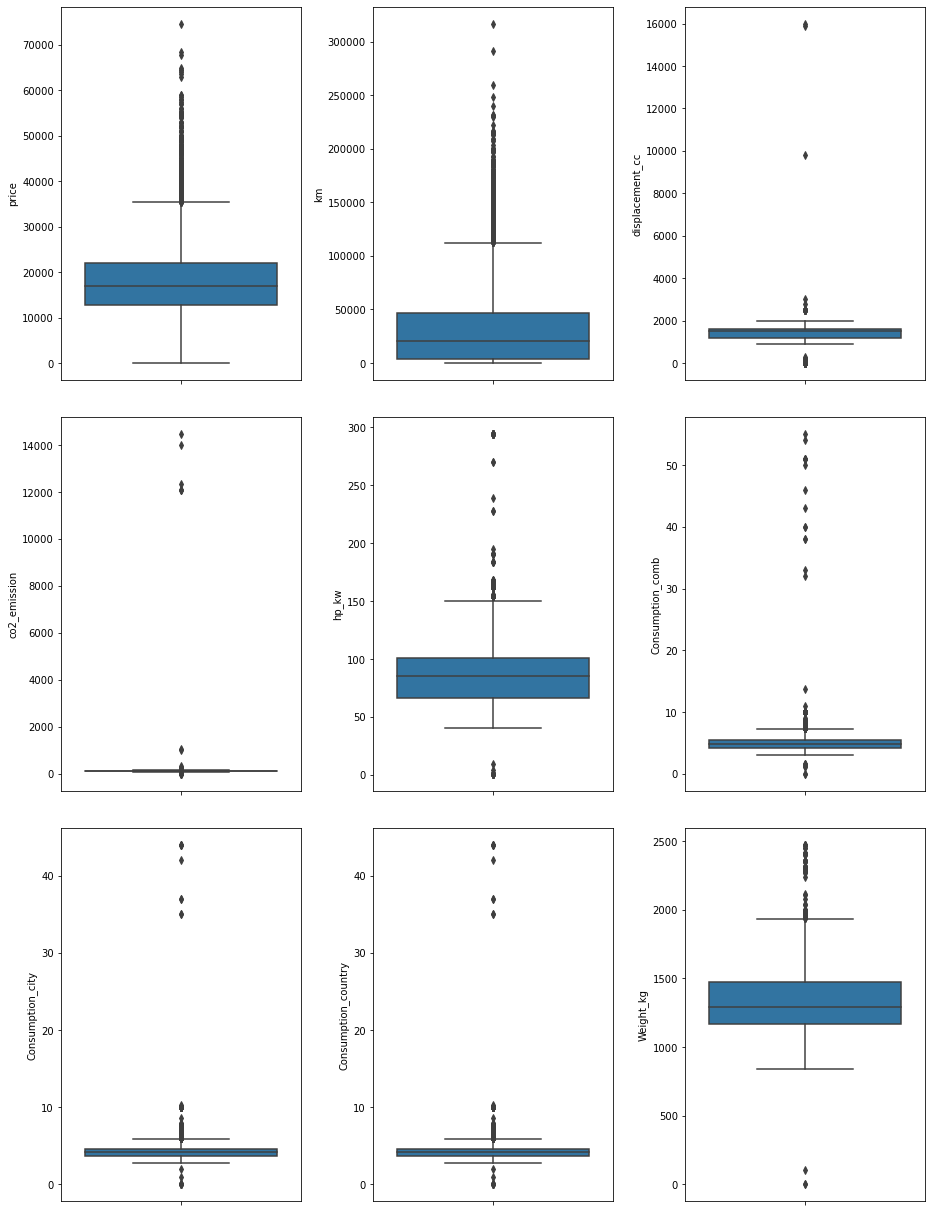

In [48]:
fig = plt.figure(figsize=(15,20))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1.5,
                    wspace=0.3,
                    hspace=0.1)
for i, col in enumerate(num_cols):
        plt.subplot(5,3,i+1)
        sns.boxplot(y=col, data=df)

In [49]:
def grab_outliers(dataframe, col_name, index=False,q1 = 0.25,q3=0.75):
    low, up = outlier_thresholds(dataframe, col_name)
                                          
    if dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].shape[0] > 10:
        ## EĞER AYKIRI DEĞER 10'DAN BÜYÜKSE BİZE HEAD'İ VER
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].head())
    else:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))])

    if index:
        outlier_index = dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].index
        return outlier_index

### grab_outliers bizim için bir analiz fonksiyonu ama index=True yaparak bize indexleri de return ettirebiliriz.

In [50]:
grab_outliers(df, "km")

   make_model body_type    price        km  prev_owner body_color paint_type  \
25    Audi A1    Sedans   8999.0  115000.0         1.0      White   Metallic   
34    Audi A1    Sedans  11900.0  126000.0         1.0      White   Metallic   
61    Audi A1   Compact   9950.0  118500.0         1.0      Black   Metallic   
63    Audi A1    Sedans  10000.0  192000.0         1.0      Black   Metallic   
64    Audi A1   Compact  10490.0  130000.0         1.0      White   Metallic   

    number_of_doors  number_of_seats gearing_type  displacement_cc  Cylinders  \
25              5.0              4.0       Manual           1000.0        3.0   
34              5.0              4.0       Manual           1400.0        3.0   
61              3.0              4.0       Manual           1000.0        3.0   
63              5.0              4.0       Manual           1600.0        4.0   
64              4.0              4.0       Manual           1400.0        3.0   

   drive_chain     Fuel  co2_emi

In [51]:
grab_outliers(df, "km",index=True)

   make_model body_type    price        km  prev_owner body_color paint_type  \
25    Audi A1    Sedans   8999.0  115000.0         1.0      White   Metallic   
34    Audi A1    Sedans  11900.0  126000.0         1.0      White   Metallic   
61    Audi A1   Compact   9950.0  118500.0         1.0      Black   Metallic   
63    Audi A1    Sedans  10000.0  192000.0         1.0      Black   Metallic   
64    Audi A1   Compact  10490.0  130000.0         1.0      White   Metallic   

    number_of_doors  number_of_seats gearing_type  displacement_cc  Cylinders  \
25              5.0              4.0       Manual           1000.0        3.0   
34              5.0              4.0       Manual           1400.0        3.0   
61              3.0              4.0       Manual           1000.0        3.0   
63              5.0              4.0       Manual           1600.0        4.0   
64              4.0              4.0       Manual           1400.0        3.0   

   drive_chain     Fuel  co2_emi

Int64Index([   25,    34,    61,    63,    64,   328,   369,   397,   443,
              465,
            ...
            15283, 15284, 15314, 15316, 15320, 15386, 15412, 15413, 15416,
            15420],
           dtype='int64', length=715)

In [52]:
km_index = grab_outliers(df, "km",index=True)

   make_model body_type    price        km  prev_owner body_color paint_type  \
25    Audi A1    Sedans   8999.0  115000.0         1.0      White   Metallic   
34    Audi A1    Sedans  11900.0  126000.0         1.0      White   Metallic   
61    Audi A1   Compact   9950.0  118500.0         1.0      Black   Metallic   
63    Audi A1    Sedans  10000.0  192000.0         1.0      Black   Metallic   
64    Audi A1   Compact  10490.0  130000.0         1.0      White   Metallic   

    number_of_doors  number_of_seats gearing_type  displacement_cc  Cylinders  \
25              5.0              4.0       Manual           1000.0        3.0   
34              5.0              4.0       Manual           1400.0        3.0   
61              3.0              4.0       Manual           1000.0        3.0   
63              5.0              4.0       Manual           1600.0        4.0   
64              4.0              4.0       Manual           1400.0        3.0   

   drive_chain     Fuel  co2_emi

In [53]:
km_index

Int64Index([   25,    34,    61,    63,    64,   328,   369,   397,   443,
              465,
            ...
            15283, 15284, 15314, 15316, 15320, 15386, 15412, 15413, 15416,
            15420],
           dtype='int64', length=715)

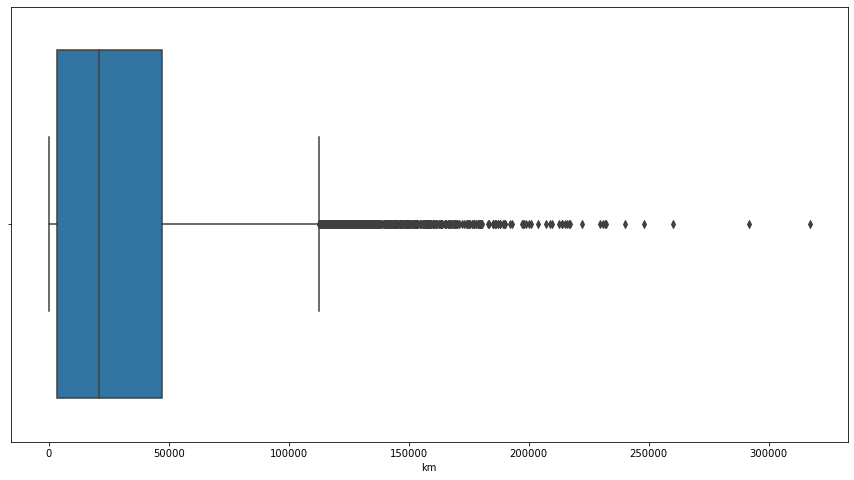

In [54]:
plt.figure(figsize=(15,8))
sns.boxplot(x=df["km"])
plt.show()

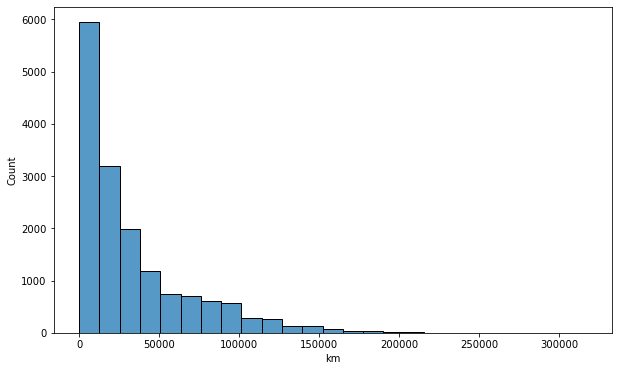

In [55]:
plt.figure()
sns.histplot(df["km"], bins = 25,kde = False);

#### evet benim feature'mda extreme değerler var outlier demiyoruz daha ! bu exteme değerler outlier olabilir mi onu kurcalayacağız?

In [56]:
df.loc[km_index]

,make_model,body_type,price,km,prev_owner,body_color,paint_type,number_of_doors,number_of_seats,gearing_type,displacement_cc,Cylinders,drive_chain,Fuel,co2_emission,comfort_convenience,entertainment_media,Extras,safety_security,Gears,age,hp_kw,Type_,upholstery_type,upholstery_color,Consumption_comb,Consumption_city,Consumption_country,insp_new,Weight_kg
25,Audi A1,Sedans,8999.0,115000.0,1.0,White,Metallic,5.0,4.0,Manual,1000.0,3.0,front,Benzine,97.0,"Air conditioning,Electrical side mirrors,Leath...","Radio,Sound system","Alloy wheels,Winter tyres","ABS,Central door lock,Central door lock with r...",5.0,3.0,70.0,Used,Cloth,Black,4.2,3.7,3.7,No,1135.0
34,Audi A1,Sedans,11900.0,126000.0,1.0,White,Metallic,5.0,4.0,Manual,1400.0,3.0,front,Diesel,97.0,"Air conditioning,Automatic climate control,Cru...","Bluetooth,CD player,Hands-free equipment,MP3,O...",Alloy wheels,"ABS,Alarm system,Central door lock,Daytime run...",5.0,3.0,66.0,Used,Cloth,Black,3.7,3.4,3.4,No,1205.0
61,Audi A1,Compact,9950.0,118500.0,1.0,Black,Metallic,3.0,4.0,Manual,1000.0,3.0,front,Benzine,102.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Central door lock with r...",5.0,3.0,70.0,Used,Cloth,Black,4.4,3.9,3.9,Yes,1110.0
63,Audi A1,Sedans,10000.0,192000.0,1.0,Black,Metallic,5.0,4.0,Manual,1600.0,4.0,front,Diesel,102.0,"Air conditioning,Armrest,Electrical side mirro...","MP3,Radio",Alloy wheels,"ABS,Central door lock,Central door lock with r...",5.0,3.0,85.0,Used,Cloth,Black,3.9,3.4,3.4,Yes,1250.0
64,Audi A1,Compact,10490.0,130000.0,1.0,White,Metallic,4.0,4.0,Manual,1400.0,3.0,front,Diesel,102.0,"Air conditioning,Electrical side mirrors,Hill ...",CD player,Alloy wheels,"ABS,Central door lock,Daytime running lights,D...",5.0,3.0,66.0,Used,Cloth,Black,3.9,3.6,3.6,Yes,1180.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15386,Renault Espace,Van,16900.0,122000.0,1.0,Black,Metallic,5.0,5.0,Semi-automatic,1600.0,4.0,front,Diesel,120.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,MP3,On-board co...","Alloy wheels,Touch screen,Voice Control","ABS,Central door lock,Central door lock with r...",6.0,3.0,118.0,Used,Full leather,Black,4.7,4.4,4.4,No,1734.0
15412,Renault Espace,Van,19900.0,130000.0,1.0,Violet,Metallic,5.0,5.0,Semi-automatic,1600.0,4.0,front,Diesel,120.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,Radio,Sound sys...","Alloy wheels,Catalytic Converter,Shift paddles...","ABS,Adaptive Cruise Control,Adaptive headlight...",6.0,3.0,118.0,Used,Full leather,Brown,4.7,4.4,4.4,No,1734.0
15413,Renault Espace,Transporter,20900.0,140000.0,1.0,Black,Metallic,5.0,5.0,Semi-automatic,1600.0,4.0,front,Diesel,120.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,On-bo...","Alloy wheels,Handicapped enabled,Shift paddles...","ABS,Alarm system,Electronic stability control,...",6.0,3.0,118.0,Used,Full leather,Brown,4.7,4.4,4.4,No,1734.0
15416,Renault Espace,Van,19800.0,130000.0,1.0,Beige,Metallic,5.0,7.0,Semi-automatic,1600.0,4.0,front,Diesel,120.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Ski bag,Touch screen,Voice Control","ABS,Alarm system,Central door lock with remote...",6.0,3.0,118.0,Used,Part leather,Grey,4.7,4.4,4.4,No,1734.0


In [57]:
# km -------> log'u alınabilir mi  ?

In [58]:
df.loc[km_index,["age","price","Type_"]]

,age,price,Type_
25,3.0,8999.0,Used
34,3.0,11900.0,Used
61,3.0,9950.0,Used
63,3.0,10000.0,Used
64,3.0,10490.0,Used
...,...,...,...
15386,3.0,16900.0,Used
15412,3.0,19900.0,Used
15413,3.0,20900.0,Used
15416,3.0,19800.0,Used


In [59]:
df.loc[km_index,["age","price","Type_","km","make_model"]].sort_values(by="age")

,age,price,Type_,km,make_model
2901,0.0,15500.0,Used,127022.0,Audi A3
14592,1.0,10450.0,Used,113392.0,Renault Clio
4312,1.0,17500.0,Used,136000.0,Audi A3
4377,2.0,16900.0,Used,115000.0,Audi A3
4388,2.0,19797.0,Used,114550.0,Audi A3
...,...,...,...,...,...
6001,3.0,11890.0,Used,133590.0,Opel Astra
6021,3.0,12490.0,Used,142684.0,Opel Astra
6033,3.0,11480.0,Used,124349.0,Opel Astra
6038,3.0,11250.0,Used,139000.0,Opel Astra


In [60]:
df.loc[(df["age"]== 0) & (df["make_model"] == "Audi A3"),["km","price"]].sort_values(by="price")

,km,price
2901,127022.000000,15500.0
4031,82400.000000,17990.0
4227,1.000000,18820.0
4198,2499.124803,18980.0
4045,10.000000,19078.0
...,...,...
3613,7.000000,38725.0
3591,7.000000,39575.0
3607,750.000000,41495.0
3590,700.000000,62900.0


In [61]:
num_cols

['price',
 'km',
 'displacement_cc',
 'co2_emission',
 'hp_kw',
 'Consumption_comb',
 'Consumption_city',
 'Consumption_country',
 'Weight_kg']

In [62]:
## km feature'nda gözüken extreme deüerleri outlier olarak değerlendiremeyiz.

### displacement_cc 

In [63]:
outlier_thresholds(df,"displacement_cc")

(600.0, 2200.0)

In [64]:
df["displacement_cc"].sort_values(ascending=False)

10932    16000.0
7169     15900.0
1951      9800.0
10771     3000.0
10513     2800.0
          ...   
12484        0.0
14198        0.0
14314        0.0
12796        0.0
13904        0.0
Name: displacement_cc, Length: 15919, dtype: float64

In [65]:
df["displacement_cc"].sort_values()

12796        0.0
12798        0.0
12790        0.0
12786        0.0
12783        0.0
          ...   
10513     2800.0
10771     3000.0
1951      9800.0
7169     15900.0
10932    16000.0
Name: displacement_cc, Length: 15919, dtype: float64

In [66]:
df.iloc[7169]

make_model                                                    Opel Astra
body_type                                                  Station wagon
price                                                            18490.0
km                                                               22327.0
prev_owner                                                           1.0
body_color                                                         Green
paint_type                                                      Metallic
number_of_doors                                                      5.0
number_of_seats                                                      5.0
gearing_type                                                   Automatic
displacement_cc                                                  15900.0
Cylinders                                                            4.0
drive_chain                                                        front
Fuel                                               

In [67]:
displacment_ccindex = grab_outliers(df,"displacement_cc",index=True)

     make_model body_type    price            km  prev_owner body_color  \
1937    Audi A1   Compact  28490.0   1382.492958         1.0      Black   
1951    Audi A1   Compact  27980.0   1382.492958         1.0      White   
3587    Audi A3    Sedans  64900.0  35000.000000         1.0       Grey   
3590    Audi A3    Sedans  62900.0    700.000000         1.0       Grey   
3592    Audi A3    Sedans  56900.0   5200.000000         1.0       Grey   

     paint_type  number_of_doors  number_of_seats    gearing_type  \
1937   Metallic              5.0              5.0       Automatic   
1951   Metallic              5.0              5.0       Automatic   
3587   Metallic              5.0              5.0  Semi-automatic   
3590   Metallic              5.0              5.0  Semi-automatic   
3592   Metallic              5.0              5.0  Semi-automatic   

      displacement_cc  Cylinders drive_chain     Fuel  co2_emission  \
1937            300.0        4.0       front  Benzine         1

In [68]:
df.loc[displacment_ccindex].sort_values(by = ["displacement_cc"])

,make_model,body_type,price,km,prev_owner,body_color,paint_type,number_of_doors,number_of_seats,gearing_type,displacement_cc,Cylinders,drive_chain,Fuel,co2_emission,comfort_convenience,entertainment_media,Extras,safety_security,Gears,age,hp_kw,Type_,upholstery_type,upholstery_color,Consumption_comb,Consumption_city,Consumption_country,insp_new,Weight_kg
12554,Opel Insignia,Station wagon,33590.0,1574.000000,1.0,Silver,Metallic,5.0,5.0,Automatic,0.0,4.0,front,Benzine,139.0,"Air conditioning,Automatic climate control,Cru...","Bluetooth,CD player,MP3,On-board computer,Radio","Alloy wheels,Roof rack,Sport seats,Voice Control","ABS,Blind spot monitor,Central door lock,Drive...",6.0,0.0,121.0,Demonstration,Part leather,Black,5.6,4.6,4.6,Yes,1487.0
12823,Opel Insignia,Station wagon,28500.0,2499.124803,1.0,Grey,Metallic,5.0,5.0,Manual,0.0,4.0,front,Benzine,139.0,"Air conditioning,Automatic climate control,Cru...","Bluetooth,On-board computer","Alloy wheels,Roof rack","ABS,Central door lock,Driver-side airbag,Elect...",6.0,0.0,121.0,Demonstration,Cloth,Black,5.6,4.6,4.6,Yes,1487.0
10559,Opel Insignia,Station wagon,16950.0,84700.000000,1.0,Silver,Metallic,5.0,5.0,Automatic,0.0,4.0,front,Diesel,135.0,"Air conditioning,Automatic climate control,Cru...",Sound system,"Alloy wheels,Roof rack","Blind spot monitor,Tire pressure monitoring sy...",6.0,3.0,125.0,Used,Full leather,Black,5.6,4.6,4.6,Yes,1487.0
12815,Opel Insignia,Station wagon,32990.0,6.000000,1.0,Silver,Metallic,5.0,5.0,Manual,0.0,4.0,front,Diesel,135.0,"Air conditioning,Automatic climate control,Cru...","Bluetooth,On-board computer","Alloy wheels,Roof rack,Sport package,Sport seats","ABS,Central door lock,Driver-side airbag,Elect...",6.0,0.0,100.0,Demonstration,Full leather,Black,5.6,4.6,4.6,Yes,1487.0
12800,Opel Insignia,Station wagon,33790.0,6446.000000,1.0,Black,Metallic,5.0,5.0,Manual,0.0,4.0,4WD,Diesel,135.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,MP3,On-board computer,Radio","Alloy wheels,Roof rack,Sport seats,Voice Control","ABS,Central door lock,Daytime running lights,D...",6.0,0.0,125.0,Demonstration,Part leather,Black,5.6,4.6,4.6,Yes,1487.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10513,Opel Insignia,Station wagon,17990.0,145000.000000,1.0,Red,Metallic,4.0,5.0,Automatic,2800.0,4.0,4WD,Benzine,253.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Roof rack,Shift paddles,Sport pac...","ABS,Adaptive Cruise Control,Blind spot monitor...",6.0,3.0,239.0,Used,Full leather,Black,11.0,8.0,8.0,No,1487.0
10771,Opel Insignia,Station wagon,12000.0,185000.000000,1.0,White,Metallic,5.0,5.0,Automatic,3000.0,6.0,front,Diesel,239.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Catalytic Converter,Roof rack,Ski...","ABS,Adaptive Cruise Control,Adaptive headlight...",6.0,3.0,100.0,Used,Cloth,Black,9.1,7.8,7.8,No,2295.0
1951,Audi A1,Compact,27980.0,1382.492958,1.0,White,Metallic,5.0,5.0,Automatic,9800.0,4.0,front,Benzine,110.0,"Air conditioning,Armrest,Automatic climate con...",Sound system,Alloy wheels,"Daytime running lights,Driver-side airbag,Elec...",5.0,0.0,85.0,New,Cloth,Black,4.8,4.2,4.2,Yes,1200.0
7169,Opel Astra,Station wagon,18490.0,22327.000000,1.0,Green,Metallic,5.0,5.0,Automatic,15900.0,4.0,front,Benzine,119.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,MP3,On-board co...","Alloy wheels,Touch screen,Voice Control","ABS,Central door lock,Daytime running lights,D...",6.0,1.0,100.0,Employee's car,Cloth,Black,4.5,3.8,3.8,Yes,1425.0


In [69]:
df["displacement_cc"].min()              # belki bu 1000 cc olabilir adam yanlış anlamş olabilir atmaktansa düzeltelim.

0.0

In [70]:
df["displacement_cc"].max()

16000.0

<AxesSubplot:xlabel='displacement_cc'>

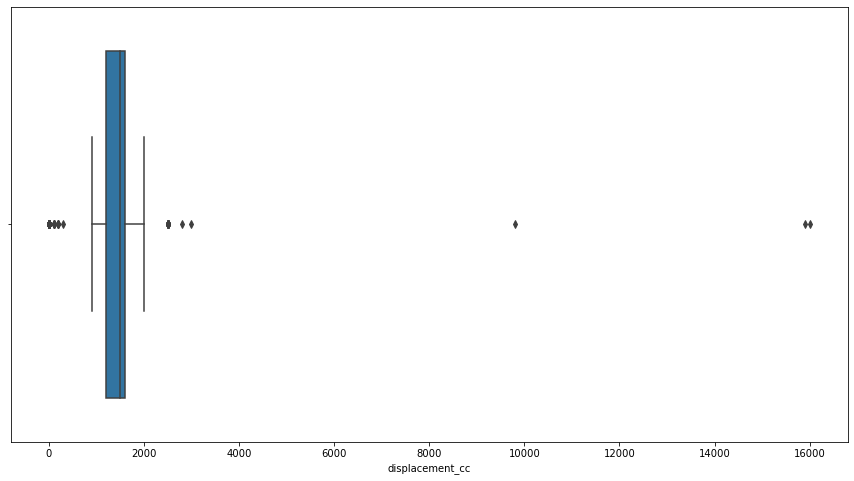

In [71]:
plt.figure(figsize=(15,8))
sns.boxplot(x = df["displacement_cc"])

In [72]:
pd.options.display.max_rows = 200
pd.options.display.max_columns = 200

In [73]:
df.loc[displacment_ccindex,["price","make_model","body_type","displacement_cc","age"]].sort_values(by = ["displacement_cc"])

,price,make_model,body_type,displacement_cc,age
12554,33590.0,Opel Insignia,Station wagon,0.0,0.0
12823,28500.0,Opel Insignia,Station wagon,0.0,0.0
10559,16950.0,Opel Insignia,Station wagon,0.0,3.0
12815,32990.0,Opel Insignia,Station wagon,0.0,0.0
12800,33790.0,Opel Insignia,Station wagon,0.0,0.0
12467,37490.0,Opel Insignia,Station wagon,0.0,0.0
12473,34490.0,Opel Insignia,Station wagon,0.0,0.0
12484,33990.0,Opel Insignia,Sedans,0.0,0.0
12499,36990.0,Opel Insignia,Station wagon,0.0,0.0
12790,35990.0,Opel Insignia,Station wagon,0.0,0.0


In [74]:
## opel insignia stagon vagon mesela 1.4 motormuş.     1.4 Motor == 1.400 cc 

In [75]:
df[(df.make_model == "Opel Insignia") & (df.body_type=="Station wagon")][["displacement_cc","hp_kw", "Cylinders"]].sort_values(by="displacement_cc", ascending=False).head(50)

,displacement_cc,hp_kw,Cylinders
10932,16000.0,88.0,4.0
10771,3000.0,100.0,6.0
10513,2800.0,239.0,4.0
13054,2000.0,154.0,4.0
12183,2000.0,125.0,4.0
11216,2000.0,125.0,4.0
11217,2000.0,125.0,4.0
12209,2000.0,125.0,4.0
12195,2000.0,125.0,4.0
11222,2000.0,125.0,4.0


In [76]:
df[(df.make_model == "Opel Insignia") & (df.body_type=="Station wagon")].displacement_cc.describe()

count     1662.000000
mean      1702.045728
std        448.995832
min          0.000000
25%       1500.000000
50%       1600.000000
75%       2000.000000
max      16000.000000
Name: displacement_cc, dtype: float64

In [77]:
df.groupby(["make_model","body_type"]).displacement_cc.describe()

count         mean         std     min     25%  \
make_model     body_type                                                        
Audi A1        Compact        1039.0  1164.581328  353.861975   300.0  1000.0   
               Coupe             2.0  1300.000000  424.264069  1000.0  1150.0   
               Sedans         1551.0  1203.610574  251.601042  1000.0  1000.0   
               Station wagon    21.0  1285.714286  215.141150  1000.0  1000.0   
               Van               1.0  2000.000000         NaN  2000.0  2000.0   
Audi A2        Off-Road          1.0  1600.000000         NaN  1600.0  1600.0   
Audi A3        Compact         182.0  1515.384615  223.445187  1000.0  1400.0   
               Convertible       8.0  1812.500000  264.237447  1400.0  1575.0   
               Coupe             4.0  1450.000000  300.000000  1000.0  1450.0   
               Sedans         2621.0  1525.867989  284.031870  1000.0  1500.0   
               Station wagon   282.0  1425.177305  350.044436  1000.0  1000.0   
Opel Astra     Compact         185.0  1430.270270  239.456886  1000.0  1400.0   
               Coupe             2.0  1400.000000    0.000000  1400.0  1400.0   
               Off-Road          1.0  1400.000000         NaN  1400.0  1400.0   
               Sedans         1053.0  1343.874644  243.690322   100.0  1000.0   
               Station wagon  1285.0  1507.237354  436.338750   100.0  1400.0   
Opel Corsa     Compact        1319.0  1339.423806   98.970275   100.0  1200.0   
               Coupe            13.0  1230.769231  110.940039  1000.0  1200.0   
               Off-Road          3.0  1400.000000    0.000000  1400.0  1400.0   
               Sedans          875.0  1299.542857  100.113306  1000.0  1200.0   
               Transporter       7.0  1214.285714   37.796447  1200.0  1200.0   
               Van               2.0  1200.000000    0.000000  1200.0  1200.0   
Opel Insignia  Compact          27.0  1466.666667  443.760157     0.0  1500.0   
               Coupe             1.0  1600.000000         NaN  1600.0  1600.0   
               Off-Road          7.0  1871.428571  221.466971  1500.0  1800.0   
               Sedans          900.0  1640.111111  213.925618     0.0  1500.0   
               Station wagon  1662.0  1702.045728  448.995832     0.0  1500.0   
               Van               1.0  1500.000000         NaN  1500.0  1500.0   
Renault Clio   Compact         484.0  1166.528926  234.046980   900.0   900.0   
               Coupe             1.0  1600.000000         NaN  1600.0  1600.0   
               Off-Road          2.0  1350.000000  212.132034  1200.0  1275.0   
               Sedans          984.0  1278.048780  299.483879     0.0  1100.0   
               Station wagon   337.0  1297.626113  209.435898   900.0  1100.0   
               Transporter      29.0  1431.034483  179.490247   900.0  1500.0   
               Van               2.0  1500.000000    0.000000  1500.0  1500.0   
Renault Duster Off-Road         34.0  1694.117647  172.224618  1600.0  1600.0   
Renault Espace Compact           6.0  1633.333333   81.649658  1600.0  1600.0   
               Coupe             2.0  1600.000000    0.000000  1600.0  1600.0   
               Off-Road          8.0  1600.000000    0.000000  1600.0  1600.0   
               Sedans           21.0  1676.190476  148.002574  1600.0  1600.0   
               Station wagon    91.0  1663.736264  122.489440  1600.0  1600.0   
               Transporter      52.0  1607.692308   55.470020  1600.0  1600.0   
               Van             811.0  1678.668311  187.974787   200.0  1600.0   

                                 50%     75%      max  
make_model     body_type                               
Audi A1        Compact        1000.0  1400.0   9800.0  
               Coupe          1300.0  1450.0   1600.0  
               Sedans         1000.0  1400.0   2000.0  
               Station wagon  1400.0  1400.0   1600.0  
               Van            2000.0  2000.0   20

In [78]:
df[(df.displacement_cc < 900)|(df.displacement_cc > 3000)].count()

make_model             55
body_type              55
price                  55
km                     55
prev_owner             55
body_color             55
paint_type             55
number_of_doors        55
number_of_seats        55
gearing_type           55
displacement_cc        55
Cylinders              55
drive_chain            55
Fuel                   55
co2_emission           55
comfort_convenience    55
entertainment_media    55
Extras                 55
safety_security        55
Gears                  55
age                    55
hp_kw                  55
Type_                  55
upholstery_type        55
upholstery_color       55
Consumption_comb       55
Consumption_city       55
Consumption_country    55
insp_new               55
Weight_kg              55
dtype: int64

In [79]:
df.loc[(df.displacement_cc < 900)|(df.displacement_cc > 3000), "displacement_cc"] = np.nan

In [80]:
df.displacement_cc.value_counts(dropna=False)

1600.0    5352
1400.0    3122
1000.0    2580
1500.0    1496
2000.0    1185
1200.0    1184
900.0      379
1100.0     289
1800.0     211
NaN         55
1300.0      39
2500.0      20
1700.0       3
1900.0       2
2800.0       1
3000.0       1
Name: displacement_cc, dtype: int64

In [81]:
df["displacement_cc"] = df.groupby(["make_model","body_type"]).displacement_cc.apply(lambda x : x.fillna(x.mode()[0]))

In [82]:
df.displacement_cc.value_counts(dropna=False,ascending=True)

2800.0       1
3000.0       1
1900.0       2
1700.0       3
2500.0      20
1300.0      39
1800.0     211
1100.0     289
900.0      379
1200.0    1184
2000.0    1185
1500.0    1511
1000.0    2582
1400.0    3127
1600.0    5385
Name: displacement_cc, dtype: int64

<AxesSubplot:xlabel='displacement_cc'>

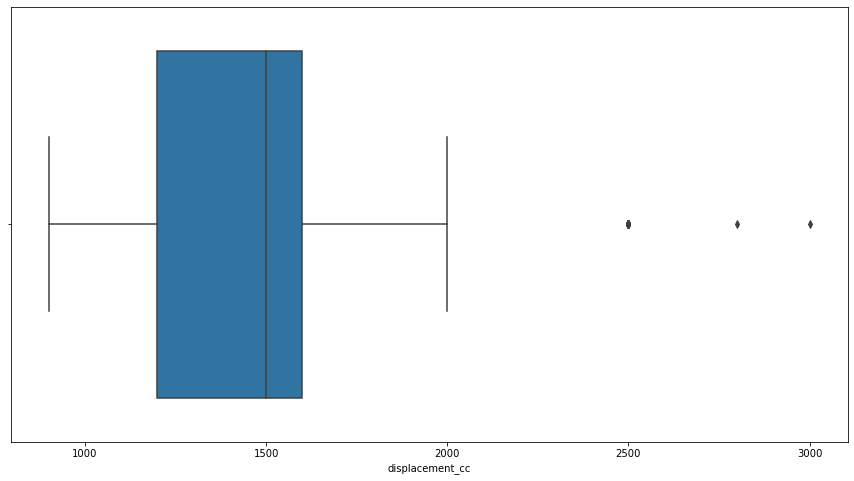

In [83]:
plt.figure(figsize=(15,8))
sns.boxplot(x = df["displacement_cc"])

<AxesSubplot:xlabel='displacement_cc'>

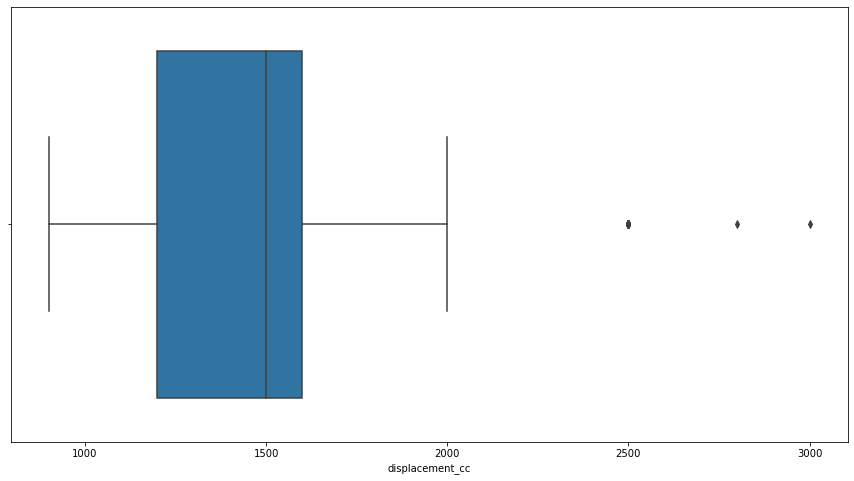

In [84]:
plt.figure(figsize=(15,8))
sns.boxplot(x = df["displacement_cc"])

#### önemli : 

In [85]:
num_cols

['price',
 'km',
 'displacement_cc',
 'co2_emission',
 'hp_kw',
 'Consumption_comb',
 'Consumption_city',
 'Consumption_country',
 'Weight_kg']

In [86]:
corr = df[num_cols].corr()
corr

,price,km,displacement_cc,co2_emission,hp_kw,Consumption_comb,Consumption_city,Consumption_country,Weight_kg
price,1.000000,-0.397150,0.284384,0.024451,0.694883,0.149711,0.190035,0.190035,0.464952
km,-0.397150,1.000000,0.303334,-0.014997,-0.000942,-0.179727,-0.196048,-0.196048,0.148167
displacement_cc,0.284384,0.303334,1.000000,0.020871,0.599439,0.016392,0.029448,0.029448,0.561410
co2_emission,0.024451,-0.014997,0.020871,1.000000,0.048374,0.054469,0.056580,0.056580,0.026063
hp_kw,0.694883,-0.000942,0.599439,0.048374,1.000000,0.206127,0.214610,0.214610,0.629868
Consumption_comb,0.149711,-0.179727,0.016392,0.054469,0.206127,1.000000,0.829608,0.829608,0.041773
Consumption_city,0.190035,-0.196048,0.029448,0.056580,0.214610,0.829608,1.000000,1.000000,0.057218
Consumption_country,0.190035,-0.196048,0.029448,0.056580,0.214610,0.829608,1.000000,1.000000,0.057218
Weight_kg,0.464952,0.148167,0.561410,0.026063,0.629868,0.041773,0.057218,0.057218,1.000000


## Genelde analitik çalışmalarda birbirleriyle yüksek korelasyonlu olan değişkenlerin çalışmalarda bulunmamasını isteriz çünkü ikisi de aslında aynı şeyi ifade ediyor.

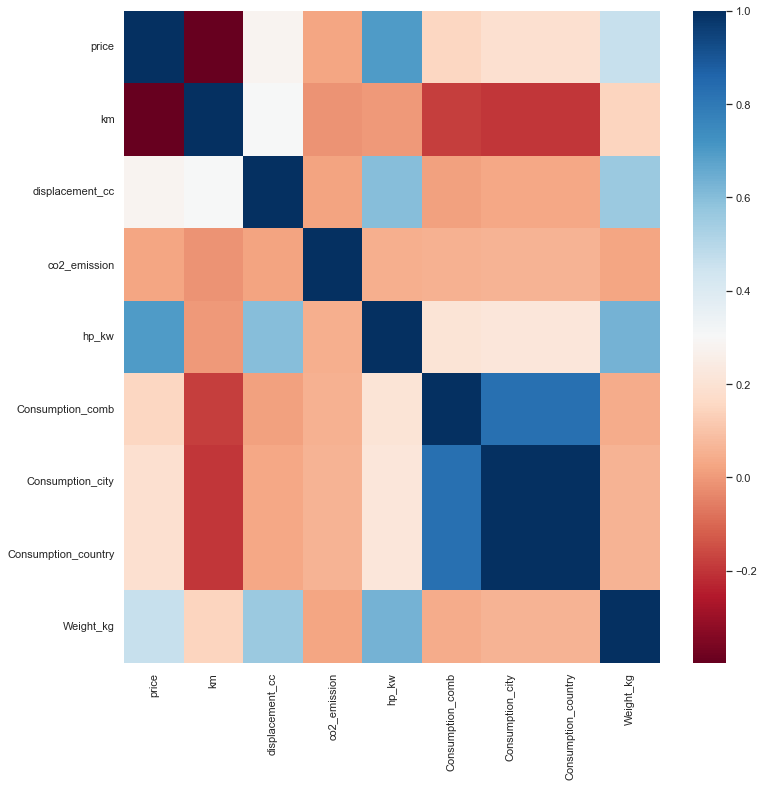

In [87]:
sns.set(rc={'figure.figsize': (12, 12)})
sns.heatmap(corr, cmap="RdBu")
plt.show()

In [88]:
cor_matrix = df.corr().abs()
cor_matrix    
## benim için negatif ya da pozitif yüksek korelasyon aynı anlama geliyor.

,price,km,prev_owner,number_of_doors,number_of_seats,displacement_cc,Cylinders,co2_emission,Gears,age,hp_kw,Consumption_comb,Consumption_city,Consumption_country,Weight_kg
price,1.000000,0.397150,0.093070,0.159339,0.247084,0.284384,0.005591,0.024451,0.444996,0.472190,0.694883,0.149711,0.190035,0.190035,0.464952
km,0.397150,1.000000,0.060357,0.009123,0.008197,0.303334,0.232362,0.014997,0.012610,0.755760,0.000942,0.179727,0.196048,0.196048,0.148167
prev_owner,0.093070,0.060357,1.000000,0.176679,0.006991,0.019479,0.013002,0.010821,0.047702,0.201386,0.016943,0.010489,0.003072,0.003072,0.022598
number_of_doors,0.159339,0.009123,0.176679,1.000000,0.100594,0.094536,0.050398,0.002604,0.168843,0.081895,0.118705,0.030362,0.019498,0.019498,0.173590
number_of_seats,0.247084,0.008197,0.006991,0.100594,1.000000,0.183026,0.218314,0.022290,0.124738,0.085172,0.285879,0.130227,0.153081,0.153081,0.327794
displacement_cc,0.284384,0.303334,0.019479,0.094536,0.183026,1.000000,0.704046,0.020871,0.381053,0.207781,0.599439,0.016392,0.029448,0.029448,0.561410
Cylinders,0.005591,0.232362,0.013002,0.050398,0.218314,0.704046,1.000000,0.033190,0.180303,0.191690,0.307889,0.098119,0.099613,0.099613,0.315162
co2_emission,0.024451,0.014997,0.010821,0.002604,0.022290,0.020871,0.033190,1.000000,0.014220,0.017237,0.048374,0.054469,0.056580,0.056580,0.026063
Gears,0.444996,0.012610,0.047702,0.168843,0.124738,0.381053,0.180303,0.014220,1.000000,0.042354,0.431851,0.005768,0.016970,0.016970,0.407711
age,0.472190,0.755760,0.201386,0.081895,0.085172,0.207781,0.191690,0.017237,0.042354,1.000000,0.086569,0.209902,0.233901,0.233901,0.066113


In [93]:
upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(bool))
upper_triangle_matrix

,price,km,prev_owner,number_of_doors,number_of_seats,displacement_cc,Cylinders,co2_emission,Gears,age,hp_kw,Consumption_comb,Consumption_city,Consumption_country,Weight_kg
price,NaN,0.39715,0.093070,0.159339,0.247084,0.284384,0.005591,0.024451,0.444996,0.472190,0.694883,0.149711,0.190035,0.190035,0.464952
km,NaN,NaN,0.060357,0.009123,0.008197,0.303334,0.232362,0.014997,0.012610,0.755760,0.000942,0.179727,0.196048,0.196048,0.148167
prev_owner,NaN,NaN,NaN,0.176679,0.006991,0.019479,0.013002,0.010821,0.047702,0.201386,0.016943,0.010489,0.003072,0.003072,0.022598
number_of_doors,NaN,NaN,NaN,NaN,0.100594,0.094536,0.050398,0.002604,0.168843,0.081895,0.118705,0.030362,0.019498,0.019498,0.173590
number_of_seats,NaN,NaN,NaN,NaN,NaN,0.183026,0.218314,0.022290,0.124738,0.085172,0.285879,0.130227,0.153081,0.153081,0.327794
displacement_cc,NaN,NaN,NaN,NaN,NaN,NaN,0.704046,0.020871,0.381053,0.207781,0.599439,0.016392,0.029448,0.029448,0.561410
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.033190,0.180303,0.191690,0.307889,0.098119,0.099613,0.099613,0.315162
co2_emission,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.014220,0.017237,0.048374,0.054469,0.056580,0.056580,0.026063
Gears,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.042354,0.431851,0.005768,0.016970,0.016970,0.407711
age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.086569,0.209902,0.233901,0.233901,0.066113


In [88]:
drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col]>0.90)]
drop_list

['Consumption_country']

In [89]:
cor_matrix[drop_list]

,Consumption_country
price,0.190035
km,0.196048
prev_owner,0.003072
number_of_doors,0.019498
number_of_seats,0.153081
displacement_cc,0.029448
Cylinders,0.099613
co2_emission,0.056580
Gears,0.016970
age,0.233901


In [90]:
df.shape

(15919, 30)

In [91]:
df.drop(drop_list,axis=1,inplace=True)

In [92]:
df.shape

(15919, 29)

### co2_emission

In [93]:
outlier_thresholds(df,"co2_emission")

(68.0, 164.0)

In [94]:
co2_index = grab_outliers(df,"co2_emission",index=True)

     make_model body_type    price       km  prev_owner body_color paint_type  \
535     Audi A1   Compact  12990.0  41200.0         1.0     Silver   Metallic   
3356    Audi A3   Compact  24950.0  57000.0         1.0       Blue   Metallic   
3587    Audi A3    Sedans  64900.0  35000.0         1.0       Grey   Metallic   
3590    Audi A3    Sedans  62900.0    700.0         1.0       Grey   Metallic   
3592    Audi A3    Sedans  56900.0   5200.0         1.0       Grey   Metallic   

      number_of_doors  number_of_seats    gearing_type  displacement_cc  \
535               5.0              5.0          Manual           1000.0   
3356              5.0              5.0  Semi-automatic           1400.0   
3587              5.0              5.0  Semi-automatic           2500.0   
3590              5.0              5.0  Semi-automatic           2500.0   
3592              5.0              5.0  Semi-automatic           2500.0   

      Cylinders drive_chain     Fuel  co2_emission  \
535     

In [95]:
df.loc[co2_index].sort_values(by="co2_emission")

,make_model,body_type,price,km,prev_owner,body_color,paint_type,number_of_doors,number_of_seats,gearing_type,displacement_cc,Cylinders,drive_chain,Fuel,co2_emission,comfort_convenience,entertainment_media,Extras,safety_security,Gears,age,hp_kw,Type_,upholstery_type,upholstery_color,Consumption_comb,Consumption_city,insp_new,Weight_kg
10566,Opel Insignia,Station wagon,16900.0,59800.000000,1.0,Black,Metallic,5.0,5.0,Automatic,2000.0,4.0,front,Diesel,0.0,"Air conditioning,Armrest,Automatic climate con...","On-board computer,Radio","Alloy wheels,Touch screen","ABS,Adaptive headlights,Daytime running lights...",6.0,2.0,125.0,Used,Part leather,Black,0.0,0.0,Yes,1487.0
8217,Opel Astra,Sedans,17850.0,4500.000000,1.0,Red,Metallic,5.0,5.0,Manual,1400.0,4.0,front,Benzine,0.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,MP3,On-board co...","Touch screen,Voice Control","ABS,Central door lock,Driver-side airbag,Elect...",6.0,0.0,92.0,Employee's car,Cloth,Black,0.0,4.2,Yes,1273.0
14902,Renault Duster,Off-Road,10850.0,116.684211,1.0,White,Uni/basic,5.0,5.0,Manual,1600.0,4.0,4WD,Benzine,1.0,"Air conditioning,Power windows","On-board computer,Radio",Roof rack,"ABS,Central door lock,Driver-side airbag,Isofi...",6.0,0.0,77.0,New,Cloth,Black,1.0,1.0,Yes,1163.0
6397,Opel Astra,Sedans,6950.0,88000.000000,1.0,Grey,Metallic,5.0,5.0,Manual,1700.0,4.0,front,Diesel,5.0,"Air conditioning,Leather steering wheel,Multi-...",CD player,Alloy wheels,"ABS,Central door lock,Driver-side airbag,Elect...",6.0,0.0,81.0,Used,Cloth,Black,4.9,4.0,Yes,1273.0
11553,Opel Insignia,Station wagon,18900.0,34386.000000,1.0,Grey,Metallic,5.0,5.0,Manual,2000.0,4.0,front,Diesel,5.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Roof rack","ABS,Adaptive headlights,Central door lock,Dayt...",6.0,1.0,125.0,Used,Cloth,Black,4.4,6.9,Yes,1633.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6578,Opel Astra,Station wagon,17850.0,29900.000000,1.0,Green,Metallic,5.0,5.0,Automatic,1400.0,4.0,front,Benzine,12087.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Roof rack,Voi...","ABS,Central door lock,Daytime running lights,D...",6.0,1.0,110.0,Used,Cloth,Black,5.1,4.3,Yes,1425.0
5818,Opel Astra,Sedans,14990.0,85182.000000,1.0,Brown,Metallic,5.0,5.0,Automatic,1400.0,4.0,front,Benzine,12087.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,MP3,On-board co...","Alloy wheels,Catalytic Converter","ABS,Central door lock,Daytime running lights,D...",6.0,3.0,110.0,Used,Cloth,Black,5.1,4.3,No,1273.0
8542,Opel Corsa,Compact,10950.0,34800.000000,2.0,Blue,Metallic,3.0,5.0,Automatic,1400.0,4.0,front,Benzine,12324.0,"Air conditioning,Cruise control,Electrical sid...","Bluetooth,Hands-free equipment,MP3,On-board co...","Alloy wheels,Catalytic Converter","ABS,Central door lock,Daytime running lights,D...",6.0,3.0,66.0,Used,Cloth,Black,5.2,4.2,No,1163.0
12343,Opel Insignia,Sedans,19950.0,15018.000000,1.0,White,Metallic,5.0,5.0,Manual,1500.0,4.0,front,Benzine,13983.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Touch screen,...","ABS,Central door lock,Daytime running lights,D...",6.0,1.0,103.0,Used,Cloth,Beige,5.9,4.9,Yes,1503.0


In [96]:
df.groupby(["make_model","body_type","Fuel"]).co2_emission.describe()

count        mean         std    min  \
make_model     body_type     Fuel                                             
Audi A1        Compact       Benzine   806.0  107.428040   10.512538   97.0   
                             Diesel    233.0  101.690987    4.497965   90.0   
               Coupe         Benzine     1.0   97.000000         NaN   97.0   
                             Diesel      1.0   99.000000         NaN   99.0   
               Sedans        Benzine  1008.0  105.162698    6.908202   97.0   
                             Diesel    543.0   99.272560    4.274196   89.0   
               Station wagon Benzine    12.0  106.083333    6.444989   97.0   
                             Diesel      9.0  100.222222    4.893306   91.0   
               Van           Benzine     1.0  105.000000         NaN  105.0   
Audi A2        Off-Road      Diesel      1.0  105.000000         NaN  105.0   
Audi A3        Compact       Benzine    71.0  117.492958    9.720190  104.0   
                             Diesel    110.0  104.136364    4.542313   89.0   
                             Hybride     1.0   36.000000         NaN   36.0   
               Convertible   Benzine     3.0  128.666667   21.079216  116.0   
                             Diesel      5.0  119.600000   13.011533   99.0   
               Coupe         Benzine     1.0  106.000000         NaN  106.0   
                             Diesel      3.0   99.000000    0.000000   99.0   
               Sedans        Benzine   728.0  116.815934   12.991656   96.0   
                             Diesel   1856.0  106.737069   30.773371   85.0   
                             Hybride     3.0   36.000000    0.000000   36.0   
                             LPG/CNG    34.0   95.823529    6.986873   91.0   
               Station wagon Benzine   135.0  114.074074    8.594192  103.0   
                             Diesel    145.0  107.068966    6.059491   88.0   
                             LPG/CNG     2.0  108.000000   19.798990   94.0   
Opel Astra     Compact       Benzine    84.0  120.345238   10.618799   96.0   
                             Diesel    101.0  100.435644    6.304627   88.0   
               Coupe         Benzine     2.0  144.000000   14.142136  134.0   
               Off-Road      Benzine     1.0  128.000000         NaN  128.0   
               Sedans        Benzine   767.0  137.058670  432.268659    0.0   
                             Diesel    284.0  102.961268   12.775387    5.0   
                             LPG/CNG     2.0  113.000000    0.000000  113.0   
               Station wagon Benzine   531.0  172.145009  733.428220   14.0   
                             Diesel    754.0  106.209549   11.755075   87.0   
Opel Corsa     Compact       Benzine  1257.0  140.723150  344.094963   51.0   
                             Diesel     61.0   99.770492    7.834525   82.0   
                             LPG/CNG     1.0  128.000000         NaN  128.0   
               Coupe         Benzine     8.0  123.125000    4.642582  114.0   
                             Diesel      4.0   95.750000    9.215024   82.0   
                             LPG/CNG     1.0  113.000000         NaN  113.0   
               Off-Road      Benzine     3.0  119.666667    0.577350  119.0   
               Sedans        Benzine   781.0  127.513444    9.186327  104.0   
                             Diesel     83.0  100.506024    5.791865   82.0   
                             LPG/CNG    11.0  116.727273    7.630084  110.0   
               Transporter   Benzine     3.0  124.000000    0.000000  124.0   
                             Diesel      4.0  100.500000    0.577350  100.0   
               Van           Benzine     2.0  128.000000    0.000000  128.0   
Opel Insignia  Compact       Benzine    17.0  137.176471    7.152231  124.0   
                             Diesel     10.0  122.400000   16.754436   99.0   
               Coupe         Diesel      1.0  135.000000         NaN  135.0   
          

In [97]:
df.loc[(df.co2_emission < 60)|(df.co2_emission > 250), "co2_emission"].count()

23

In [98]:
df.loc[(df.co2_emission < 60)|(df.co2_emission > 250), "co2_emission"] = np.nan

In [99]:
df.co2_emission.isnull().sum()

23

In [100]:
df['co2_emission']=df['co2_emission'].fillna(df.groupby(['make_model', 'body_type','Fuel'])['co2_emission'].transform('median'))

In [101]:
df.co2_emission.isnull().sum()

4

In [102]:
df['co2_emission']=df['co2_emission'].fillna(df.groupby(['make_model', 'body_type'])['co2_emission'].transform('median'))

In [103]:
df.co2_emission.isnull().sum()

0

<AxesSubplot:xlabel='co2_emission'>

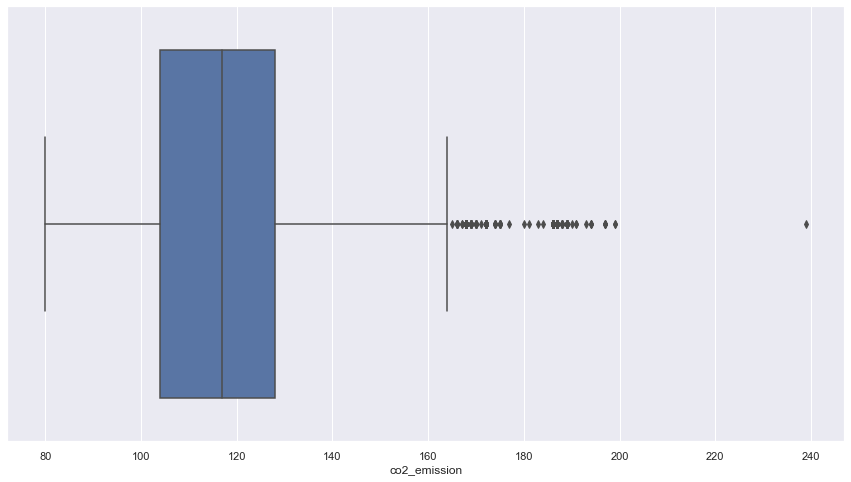

In [104]:
plt.figure(figsize=(15,8))
sns.boxplot(x = df["co2_emission"])

In [105]:
## HALA ÇOK FAZLA OUTLIER VAR .

## hp_kw 

In [106]:
outlier_thresholds(df,"hp_kw")

(13.5, 153.5)

<AxesSubplot:xlabel='hp_kw'>

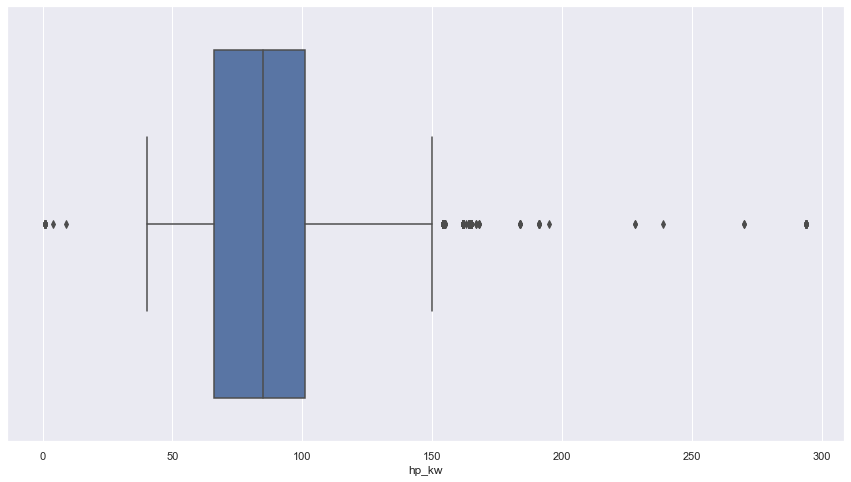

In [107]:
plt.figure(figsize=(15,8))
sns.boxplot(x = df["hp_kw"])

In [108]:
df.hp_kw.value_counts().sort_index()

1.0        20
4.0         1
9.0         1
40.0        2
44.0        1
51.0      695
52.0       22
53.0        2
54.0      276
55.0      593
56.0      286
57.0       10
60.0      160
63.0        2
65.0        4
66.0     2124
67.0       40
70.0      889
71.0       59
74.0       81
75.0        1
76.0        4
77.0      345
78.0       20
80.0        3
81.0     1402
82.0       22
84.0        1
85.0     2557
86.0        2
87.0      236
88.0      177
89.0        2
90.0        4
92.0      466
93.0        3
96.0       72
98.0        3
100.0    1311
101.0      47
103.0     253
104.0       8
110.0    1114
112.0       7
115.0       1
117.0       6
118.0     547
119.0      30
120.0       8
121.0     393
122.0      35
123.0       1
125.0     709
127.0       2
132.0       1
133.0       1
135.0      24
137.0       1
140.0       2
141.0      16
143.0       2
146.0      18
147.0     383
149.0       3
150.0       2
154.0      39
155.0       6
162.0      98
163.0       1
164.0      27
165.0     194
167.0 

In [109]:
df.loc[df["hp_kw"] == 51,["hp_kw","make_model","body_type","displacement_cc"]]

,hp_kw,make_model,body_type,displacement_cc
8584,51.0,Opel Corsa,Compact,1400.0
8599,51.0,Opel Corsa,Sedans,1200.0
8600,51.0,Opel Corsa,Sedans,1200.0
8601,51.0,Opel Corsa,Sedans,1200.0
8602,51.0,Opel Corsa,Sedans,1200.0
...,...,...,...,...
10441,51.0,Opel Corsa,Compact,1200.0
10444,51.0,Opel Corsa,Compact,1200.0
10446,51.0,Opel Corsa,Compact,1200.0
10449,51.0,Opel Corsa,Compact,1200.0


In [110]:
df.loc[df.hp_kw <50, "hp_kw"] = np.nan

In [111]:
df["hp_kw"] = df.groupby(["make_model", "displacement_cc", "Cylinders", "Fuel"]).hp_kw.apply(lambda x : x.fillna(x.median()))

In [112]:
df["hp_kw"].isnull().sum()

0

<AxesSubplot:xlabel='hp_kw'>

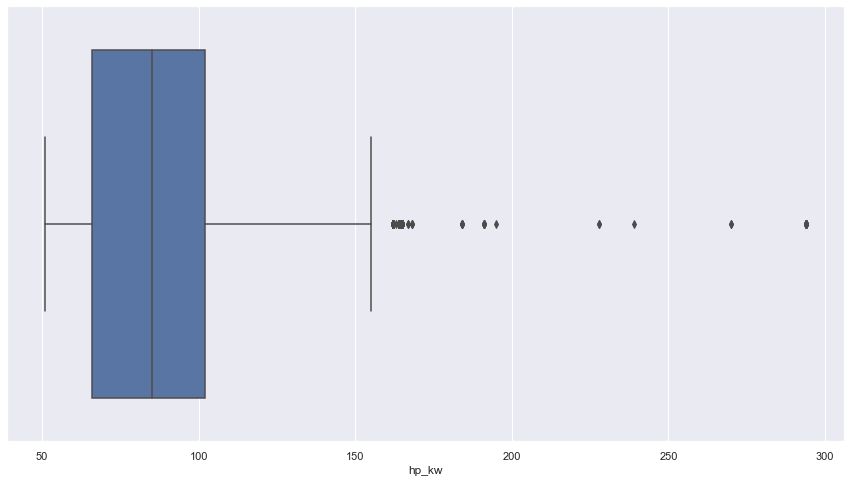

In [113]:
plt.figure(figsize=(15,8))
sns.boxplot(x = df["hp_kw"])

### Weight_kg

In [114]:
outlier_thresholds(df,"Weight_kg")

(704.5, 1932.5)

<AxesSubplot:xlabel='Weight_kg'>

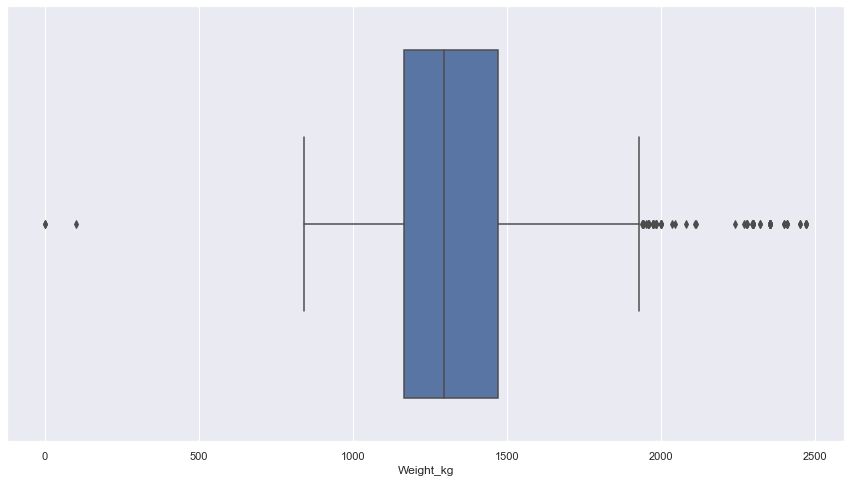

In [115]:
plt.figure(figsize=(15,8))
sns.boxplot(x = df["Weight_kg"])

In [116]:
weight_index = grab_outliers(df,"Weight_kg",index=True)

      make_model      body_type    price        km  prev_owner body_color  \
1143     Audi A1        Compact  19229.0    8263.0         1.0      Beige   
5715  Opel Astra  Station wagon  12450.0   79000.0         1.0      Black   
5725  Opel Astra  Station wagon  15490.0   28023.0         1.0     Silver   
5830  Opel Astra  Station wagon  15690.0   42981.0         1.0     Silver   
5934  Opel Astra  Station wagon  12990.0  125968.0         1.0       Blue   

     paint_type  number_of_doors  number_of_seats gearing_type  \
1143   Metallic              5.0              4.0    Automatic   
5715   Metallic              5.0              5.0    Automatic   
5725   Metallic              5.0              5.0    Automatic   
5830   Metallic              5.0              5.0    Automatic   
5934   Metallic              5.0              5.0    Automatic   

      displacement_cc  Cylinders drive_chain     Fuel  co2_emission  \
1143           1000.0        3.0       front  Benzine         102.0  

In [117]:
df.loc[weight_index]

,make_model,body_type,price,km,prev_owner,body_color,paint_type,number_of_doors,number_of_seats,gearing_type,displacement_cc,Cylinders,drive_chain,Fuel,co2_emission,comfort_convenience,entertainment_media,Extras,safety_security,Gears,age,hp_kw,Type_,upholstery_type,upholstery_color,Consumption_comb,Consumption_city,insp_new,Weight_kg
1143,Audi A1,Compact,19229.0,8263.000000,1.0,Beige,Metallic,5.0,4.0,Automatic,1000.0,3.0,front,Benzine,102.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Catalytic Converter,Sport seats,S...","ABS,Central door lock,Daytime running lights,D...",7.0,1.0,70.0,Used,Cloth,Black,4.6,4.0,Yes,102.0
5715,Opel Astra,Station wagon,12450.0,79000.000000,1.0,Black,Metallic,5.0,5.0,Automatic,1600.0,4.0,front,Diesel,104.0,"Air conditioning,Cruise control,Multi-function...",On-board computer,Roof rack,"ABS,Central door lock,Daytime running lights,D...",6.0,2.0,100.0,Used,Cloth,Black,3.9,3.5,No,1985.0
5725,Opel Astra,Station wagon,15490.0,28023.000000,1.0,Silver,Metallic,5.0,5.0,Automatic,1600.0,4.0,front,Diesel,119.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,MP3,On-board co...","Roof rack,Touch screen,Voice Control","ABS,Central door lock,Driver-side airbag,Elect...",6.0,1.0,100.0,Used,Cloth,Black,4.5,3.8,Yes,1975.0
5830,Opel Astra,Station wagon,15690.0,42981.000000,1.0,Silver,Metallic,5.0,5.0,Automatic,1600.0,4.0,front,Diesel,119.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,MP3,On-board co...","Alloy wheels,Roof rack,Touch screen,Voice Control","ABS,Central door lock,Daytime running lights,D...",6.0,1.0,100.0,Used,Cloth,Black,4.5,3.8,Yes,1975.0
5934,Opel Astra,Station wagon,12990.0,125968.000000,1.0,Blue,Metallic,5.0,5.0,Automatic,1600.0,4.0,front,Diesel,119.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,MP3,On-board co...","Alloy wheels,Roof rack,Touch screen,Trailer hi...","ABS,Adaptive Cruise Control,Blind spot monitor...",6.0,2.0,100.0,Used,Part leather,Black,4.5,3.8,No,1975.0
5973,Opel Astra,Station wagon,13500.0,57740.000000,1.0,Silver,Metallic,5.0,5.0,Automatic,1600.0,4.0,front,Diesel,119.0,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Hands-free equipment,MP3,On-board co...",Voice Control,"ABS,Central door lock,Daytime running lights,D...",6.0,3.0,100.0,Used,Cloth,Other,4.5,3.8,No,1975.0
5976,Opel Astra,Station wagon,13650.0,87000.000000,1.0,Black,Metallic,5.0,5.0,Automatic,1600.0,4.0,front,Diesel,104.0,"Air conditioning,Cruise control,Multi-function...","On-board computer,Radio",Roof rack,"ABS,Central door lock,Daytime running lights,D...",6.0,2.0,100.0,Used,Cloth,Black,3.9,3.5,No,1985.0
6004,Opel Astra,Station wagon,11850.0,97000.000000,1.0,Black,Metallic,5.0,5.0,Automatic,1600.0,4.0,front,Diesel,104.0,"Air conditioning,Cruise control,Multi-function...","On-board computer,Radio",Roof rack,"ABS,Central door lock,Daytime running lights,D...",6.0,2.0,100.0,Used,Cloth,Black,3.9,3.5,No,1985.0
6022,Opel Astra,Station wagon,12450.0,79000.000000,1.0,Black,Metallic,5.0,5.0,Automatic,1600.0,4.0,front,Diesel,104.0,"Air conditioning,Cruise control,Multi-function...","On-board computer,Radio",Roof rack,"ABS,Central door lock,Daytime running lights,D...",6.0,2.0,100.0,Used,Cloth,Black,3.9,3.5,No,1985.0
6168,Opel Astra,Station wagon,10450.0,91000.000000,1.0,Grey,Metallic,5.0,5.0,Manual,1600.0,4.0,front,Diesel,99.0,"Air conditioning,Cruise control,Multi-function...","On-board computer,Radio",Roof rack,"ABS,Central door lock,Daytime running lights,D...",6.0,2.0,81.0,Used,Cloth,Black,3.6,3.3,No,1985.0


In [118]:
df.loc[(df["Weight_kg"] < 704.5  )]

,make_model,body_type,price,km,prev_owner,body_color,paint_type,number_of_doors,number_of_seats,gearing_type,displacement_cc,Cylinders,drive_chain,Fuel,co2_emission,comfort_convenience,entertainment_media,Extras,safety_security,Gears,age,hp_kw,Type_,upholstery_type,upholstery_color,Consumption_comb,Consumption_city,insp_new,Weight_kg
1143,Audi A1,Compact,19229.0,8263.0,1.0,Beige,Metallic,5.0,4.0,Automatic,1000.0,3.0,front,Benzine,102.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Catalytic Converter,Sport seats,S...","ABS,Central door lock,Daytime running lights,D...",7.0,1.0,70.0,Used,Cloth,Black,4.6,4.0,Yes,102.0
8355,Opel Corsa,Compact,12945.0,2015.0,1.0,Silver,Metallic,5.0,5.0,Automatic,1400.0,4.0,front,Benzine,112.0,"Air conditioning,Electrical side mirrors,Hill ...",Radio,Catalytic Converter,"ABS,Central door lock,Daytime running lights,D...",5.0,1.0,66.0,Used,Cloth,Black,4.8,4.1,Yes,1.0
12779,Opel Insignia,Station wagon,39299.0,10.0,1.0,Black,Metallic,5.0,5.0,Manual,1500.0,4.0,front,Benzine,139.0,"Heated steering wheel,Hill Holder,Park Distanc...","Bluetooth,Digital radio,Hands-free equipment,O...","Alloy wheels,Roof rack","Fog lights,Lane departure warning system",6.0,0.0,121.0,New,Cloth,Black,5.6,4.6,Yes,1.0


In [119]:
df.loc[(df["Weight_kg"] < 704.5  ), "Weight_kg"] 

1143     102.0
8355       1.0
12779      1.0
Name: Weight_kg, dtype: float64

In [120]:
df.loc[(df["Weight_kg"] < 704.5  ), "Weight_kg"] = np.nan

In [121]:
df["Weight_kg"] = df.groupby(["make_model", "body_type"]).Weight_kg.apply(lambda x : x.fillna(x.median()))

<AxesSubplot:xlabel='Weight_kg'>

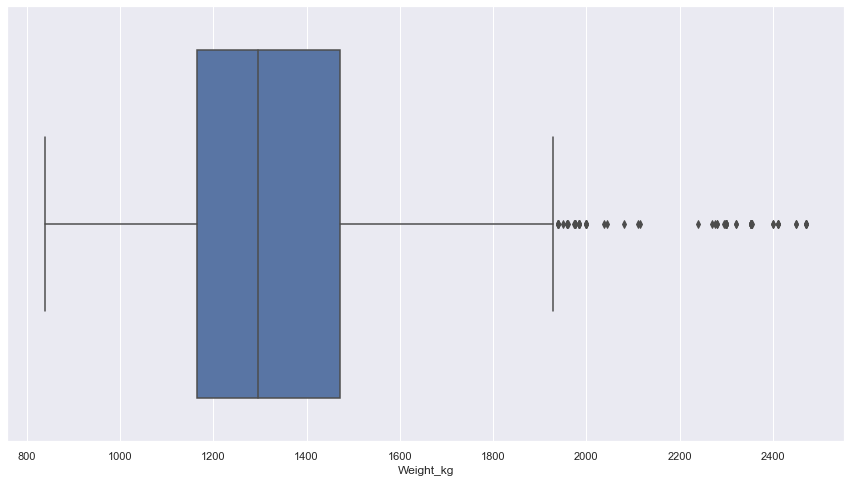

In [122]:
plt.figure(figsize=(15,8))
sns.boxplot(x = df["Weight_kg"])

### Consumption_comb

In [123]:
outlier_thresholds(df,"Consumption_comb")

(2.1499999999999986, 7.350000000000001)

<AxesSubplot:xlabel='Consumption_comb'>

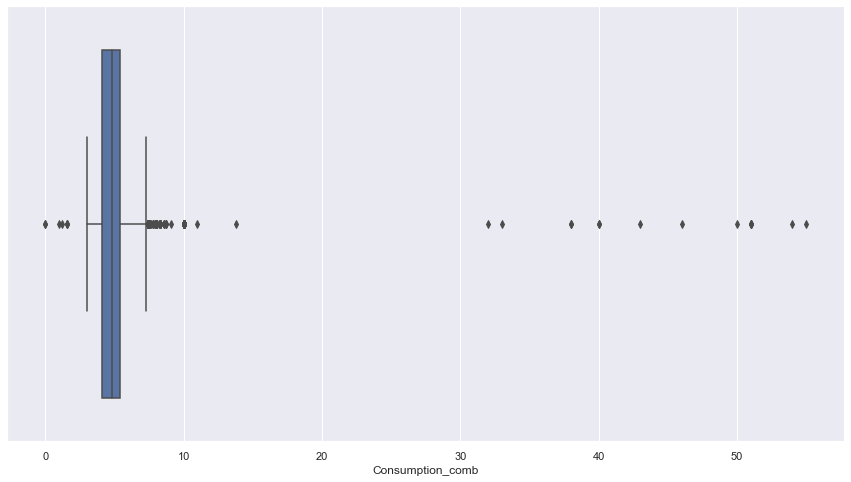

In [124]:
plt.figure(figsize=(15,8))
sns.boxplot(x = df["Consumption_comb"])

In [125]:
df.loc[(df.Consumption_comb <1)|(df.Consumption_comb > 15), "Consumption_comb"] = np.nan

In [126]:
df.Consumption_comb.isnull().sum()

17

In [127]:
df["Consumption_comb"] = df.groupby(["make_model", "body_type","Fuel","displacement_cc"])['Consumption_comb'].apply(lambda x : x.fillna(x.median()).fillna(df.Consumption_comb.median()))

In [128]:
df.Consumption_comb.isnull().sum()

0

<AxesSubplot:xlabel='Consumption_comb'>

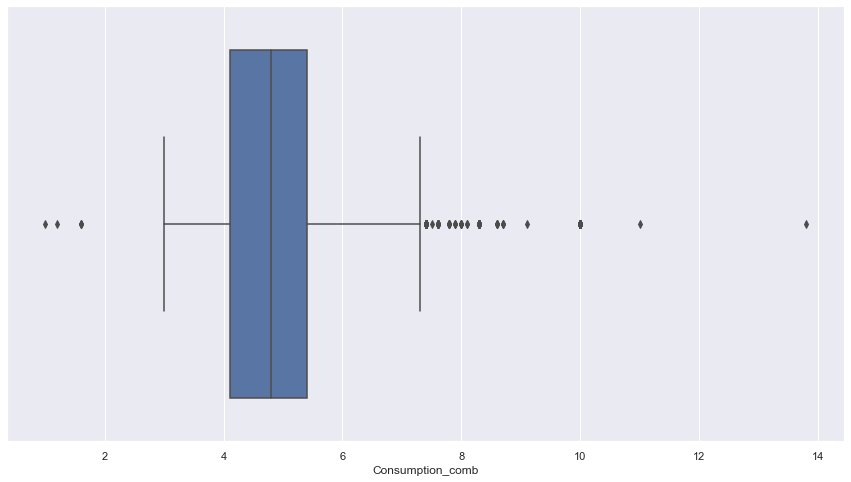

In [129]:
plt.figure(figsize=(15,8))
sns.boxplot(x = df["Consumption_comb"])

In [130]:
df["Consumption_comb"].min()

1.0

<AxesSubplot:xlabel='Fuel', ylabel='Consumption_comb'>

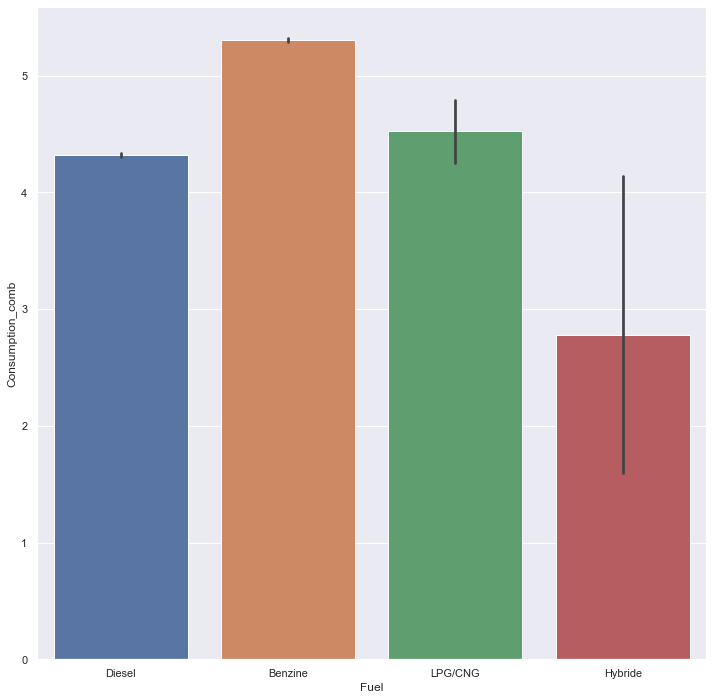

In [131]:
sns.barplot(data=df, x="Fuel", y="Consumption_comb")

## target feature ------>  price

In [132]:
df["price"].describe()

count    15919.000000
mean     18019.896727
std       7386.169409
min         13.000000
25%      12850.000000
50%      16900.000000
75%      21900.000000
max      74600.000000
Name: price, dtype: float64

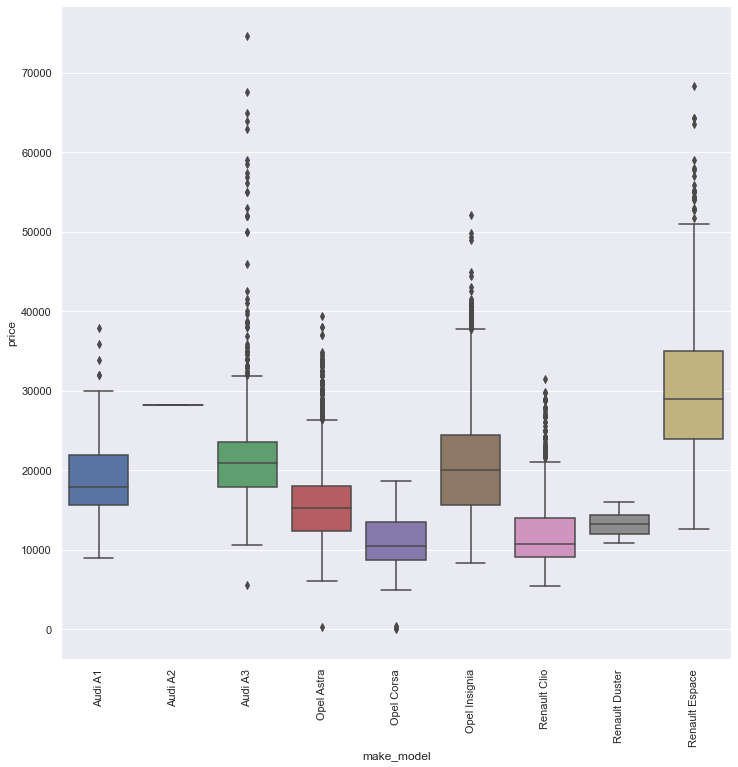

In [133]:
sns.boxplot(data=df, x="make_model", y="price")
plt.xticks(rotation=90);

In [134]:
outlier_thresholds(df,"price")

(-725.0, 35475.0)

In [135]:
df.loc[df["make_model"] == "Opel Corsa" ]["price"].mean()

11047.09553853087

In [136]:
df.loc[(df["make_model"] == "Opel Corsa"  )  &  (df["price"]   < 3000)  ]

,make_model,body_type,price,km,prev_owner,body_color,paint_type,number_of_doors,number_of_seats,gearing_type,displacement_cc,Cylinders,drive_chain,Fuel,co2_emission,comfort_convenience,entertainment_media,Extras,safety_security,Gears,age,hp_kw,Type_,upholstery_type,upholstery_color,Consumption_comb,Consumption_city,insp_new,Weight_kg
8594,Opel Corsa,Sedans,13.0,123.0,1.0,Gold,Metallic,3.0,5.0,Manual,1400.0,4.0,front,Benzine,128.0,"Air conditioning,Cruise control,Electrical sid...","Bluetooth,CD player,Hands-free equipment,MP3,O...",Alloy wheels,"ABS,Adaptive headlights,Central door lock with...",5.0,1.0,66.0,Used,Cloth,Black,5.6,4.9,Yes,1141.0
8828,Opel Corsa,Compact,120.0,12.0,1.0,Grey,Metallic,5.0,5.0,Manual,1000.0,3.0,front,Benzine,107.0,"Air conditioning,Automatic climate control,Cru...","Digital radio,On-board computer,Radio","Alloy wheels,Sport suspension","Central door lock,Daytime running lights,Drive...",6.0,0.0,66.0,New,Cloth,Black,4.6,4.1,Yes,1099.0
8829,Opel Corsa,Compact,331.0,10.0,1.0,White,Metallic,5.0,5.0,Manual,1000.0,3.0,front,Benzine,128.0,"Air conditioning,Armrest,Automatic climate con...","Hands-free equipment,On-board computer,Radio","Alloy wheels,Sport package","ABS,Central door lock,Driver-side airbag,Elect...",6.0,0.0,66.0,New,Cloth,Black,5.6,4.7,Yes,1163.0


In [137]:
df.drop(index=[8829, 8828, 2594], inplace=True)

In [138]:
df.loc[df["make_model"] == "Opel Astra" ]["price"].mean()

15834.663895486936

In [139]:
df.loc[(df["make_model"] == "Opel Astra"  )  &  (df["price"]   < 3000)  ]

,make_model,body_type,price,km,prev_owner,body_color,paint_type,number_of_doors,number_of_seats,gearing_type,displacement_cc,Cylinders,drive_chain,Fuel,co2_emission,comfort_convenience,entertainment_media,Extras,safety_security,Gears,age,hp_kw,Type_,upholstery_type,upholstery_color,Consumption_comb,Consumption_city,insp_new,Weight_kg
6066,Opel Astra,Station wagon,255.0,5563.0,1.0,Gold,Metallic,5.0,5.0,Manual,1600.0,4.0,front,Diesel,101.0,"Air conditioning,Cruise control,Electrical sid...","Bluetooth,Hands-free equipment,On-board comput...",Roof rack,"ABS,Central door lock with remote control,Dayt...",6.0,1.0,100.0,Used,Cloth,Black,3.8,3.4,Yes,1403.0


In [140]:
df.drop(index=[6066], inplace=True)

In [94]:
df.loc[df["make_model"] == "Audi A3" ]["price"].mean()

20996.693251533743

In [141]:
df[df["make_model"] == "Audi A2"]

,make_model,body_type,price,km,prev_owner,body_color,paint_type,number_of_doors,number_of_seats,gearing_type,displacement_cc,Cylinders,drive_chain,Fuel,co2_emission,comfort_convenience,entertainment_media,Extras,safety_security,Gears,age,hp_kw,Type_,upholstery_type,upholstery_color,Consumption_comb,Consumption_city,insp_new,Weight_kg
2614,Audi A2,Off-Road,28200.0,26166.0,1.0,Grey,Metallic,5.0,5.0,Manual,1600.0,4.0,front,Diesel,105.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...",Alloy wheels,"ABS,Adaptive Cruise Control,Central door lock,...",6.0,1.0,85.0,Employee's car,Cloth,Black,4.9,4.5,Yes,1163.0


### dtype'ı numeric olmasına rağmen kategorik olan değişkenlerdeki anormalliklerin giderilmesi :

#### Cylinders

In [142]:
df.Cylinders.value_counts(dropna=False)

4.0    12410
3.0     3475
5.0       22
6.0        3
8.0        2
2.0        2
1.0        1
Name: Cylinders, dtype: int64

In [143]:
df.groupby(["make_model","body_type", "displacement_cc"]).Cylinders.describe().head(50)

count      mean       std  min  \
make_model body_type     displacement_cc                                    
Audi A1    Compact       900.0               5.0  4.000000  0.000000  4.0   
                         1000.0            678.0  3.016224  0.213370  3.0   
                         1400.0            259.0  3.177606  0.382921  3.0   
                         1500.0             14.0  4.000000  0.000000  4.0   
                         1600.0             72.0  3.986111  0.117851  3.0   
                         1800.0              2.0  4.000000  0.000000  4.0   
                         2000.0              8.0  4.000000  0.000000  4.0   
           Coupe         1000.0              1.0  3.000000       NaN  3.0   
                         1600.0              1.0  4.000000       NaN  4.0   
           Sedans        1000.0            902.0  3.009978  0.099445  3.0   
                         1200.0              1.0  4.000000       NaN  4.0   
                         1400.0            389.0  3.177378  0.382480  3.0   
                         1500.0              2.0  4.000000  0.000000  4.0   
                         1600.0            238.0  3.995798  0.064820  3.0   
                         1800.0             14.0  4.000000  0.000000  4.0   
                         2000.0              5.0  4.000000  0.000000  4.0   
           Station wagon 1000.0              7.0  3.000000  0.000000  3.0   
                         1400.0             12.0  3.333333  0.492366  3.0   
                         1600.0              2.0  4.000000  0.000000  4.0   
           Van           2000.0              1.0  4.000000       NaN  4.0   
Audi A2    Off-Road      1600.0              1.0  4.000000       NaN  4.0   
Audi A3    Compact       1000.0             16.0  3.000000  0.000000  3.0   
                         1200.0              1.0  4.000000       NaN  4.0   
                         1400.0             49.0  4.000000  0.000000  4.0   
                         1500.0              5.0  3.600000  0.547723  3.0   
                         1600.0            100.0  4.000000  0.000000  4.0   
                         2000.0             10.0  4.000000  0.000000  4.0   
                         2500.0              1.0  5.000000       NaN  5.0   
           Convertible   1400.0              1.0  4.000000       NaN  4.0   
                         1500.0              1.0  4.000000       NaN  4.0   
                         1600.0              1.0  4.000000       NaN  4.0   
                         2000.0              5.0  4.000000  0.000000  4.0   
           Coupe         1000.0              1.0  3.000000       NaN  3.0   
                         1600.0              3.0  4.000000  0.000000  4.0   
           Sedans        1000.0            441.0  3.006803  0.082291  3.0   
                         1200.0             32.0  4.000000  0.000000  4.0   
                         1400.0            108.0  4.000000  0.000000  4.0   
                         1500.0            154.0  4.000000  0.000000  4.0   
                         1600.0           1607.0  3.998755  0.035267  3.0   
                         1800.0              2.0  4.000000  0.000000  4.0   
                         1900.0              1.0  4.000000       NaN  4.0   
                         2000.0            258.0  4.000000  0.000000  4.0   
                         2500.0             18.0  5.000000  0.000000  5.0   
           Station wagon 1000.0             98.0  3.000000  0.000000  3.0   
                         1200.0              3.0  4.000000  0.000000  4.0   
                         1400.0             13.0  4.000000  0.000000  4.0   
                         1500.0             20.0  4.000000  0.000000  4.0   
                         1600.0            111.0  4.009009  0.094916  4.0   
                         2000.0             36.0  4.000000  0.000000  4.0   
                         2500.0              1.0  5.000000       NaN  5.0   

                                      

In [144]:
df.loc[(df.Cylinders < 3)|(df.Cylinders > 5), "Cylinders"].count()

8

In [145]:
df.loc[(df.Cylinders < 3)|(df.Cylinders > 5), "Cylinders"] = np.nan

In [146]:
df.Cylinders.value_counts(dropna=False)

4.0    12410
3.0     3475
5.0       22
NaN        8
Name: Cylinders, dtype: int64

In [147]:
df["Cylinders"] = df.groupby(["make_model","body_type", "displacement_cc"]).Cylinders.apply(lambda x : x.fillna(4))

In [148]:
df["Cylinders"].value_counts(dropna=False)

4.0    12418
3.0     3475
5.0       22
Name: Cylinders, dtype: int64

#### number_of_doors

In [149]:
df.loc[df["number_of_doors"]==1]

,make_model,body_type,price,km,prev_owner,body_color,paint_type,number_of_doors,number_of_seats,gearing_type,displacement_cc,Cylinders,drive_chain,Fuel,co2_emission,comfort_convenience,entertainment_media,Extras,safety_security,Gears,age,hp_kw,Type_,upholstery_type,upholstery_color,Consumption_comb,Consumption_city,insp_new,Weight_kg
13782,Renault Clio,Compact,8500.0,41493.0,1.0,White,Metallic,1.0,5.0,Manual,1500.0,4.0,front,Diesel,85.0,"Air conditioning,Cruise control,Hill Holder,Mu...","Bluetooth,On-board computer",Alloy wheels,"ABS,Central door lock,Daytime running lights,D...",5.0,3.0,55.0,Used,Cloth,Black,5.0,4.4,No,1087.0


In [150]:
df.loc[(df.make_model=="Renault Clio")&(df.body_type=="Compact"), "number_of_doors"].mode()[0]

5.0

In [151]:
df.loc[df["number_of_doors"]==1,"number_of_doors"] = df.loc[(df.make_model=="Renault Clio")&(df.body_type=="Compact"), "number_of_doors"].mode()[0]

In [152]:
df[df.number_of_doors==7]

,make_model,body_type,price,km,prev_owner,body_color,paint_type,number_of_doors,number_of_seats,gearing_type,displacement_cc,Cylinders,drive_chain,Fuel,co2_emission,comfort_convenience,entertainment_media,Extras,safety_security,Gears,age,hp_kw,Type_,upholstery_type,upholstery_color,Consumption_comb,Consumption_city,insp_new,Weight_kg
15202,Renault Espace,Van,21600.0,78000.0,1.0,Brown,Metallic,7.0,5.0,Automatic,1600.0,4.0,front,Diesel,120.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Digital radio,MP3,On-board computer,...","Alloy wheels,Touch screen","ABS,Blind spot monitor,Central door lock,Dayti...",6.0,3.0,118.0,Used,Full leather,Brown,4.6,4.4,No,1734.0


In [153]:
df.loc[(df.make_model=="Renault Espace")&(df.body_type=="Van"), "number_of_doors"].mode()[0]

5.0

In [154]:
df.loc[df.number_of_doors==7,"number_of_doors"] 

15202    7.0
Name: number_of_doors, dtype: float64

In [155]:
df.loc[df.number_of_doors==7,"number_of_doors"] = df.loc[(df.make_model=="Renault Espace")&(df.body_type=="Van"), "number_of_doors"].mode()[0]

In [156]:
df["number_of_doors"].value_counts()

5.0    11785
4.0     3079
3.0      832
2.0      219
Name: number_of_doors, dtype: int64

#### number_of_seats

In [157]:
df["number_of_seats"].value_counts()

5.0    14304
4.0     1127
7.0      362
2.0      119
6.0        2
3.0        1
Name: number_of_seats, dtype: int64

In [158]:
df[df["number_of_seats"]==3]

,make_model,body_type,price,km,prev_owner,body_color,paint_type,number_of_doors,number_of_seats,gearing_type,displacement_cc,Cylinders,drive_chain,Fuel,co2_emission,comfort_convenience,entertainment_media,Extras,safety_security,Gears,age,hp_kw,Type_,upholstery_type,upholstery_color,Consumption_comb,Consumption_city,insp_new,Weight_kg
1636,Audi A1,Compact,23090.0,9821.0,1.0,Black,Metallic,2.0,3.0,Automatic,1800.0,4.0,front,Benzine,134.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Catalytic Converter,Sport package...","ABS,Central door lock,Daytime running lights,D...",7.0,1.0,141.0,Used,Part leather,Black,5.8,4.9,Yes,1180.0


In [159]:
df[df["number_of_seats"]==6]

,make_model,body_type,price,km,prev_owner,body_color,paint_type,number_of_doors,number_of_seats,gearing_type,displacement_cc,Cylinders,drive_chain,Fuel,co2_emission,comfort_convenience,entertainment_media,Extras,safety_security,Gears,age,hp_kw,Type_,upholstery_type,upholstery_color,Consumption_comb,Consumption_city,insp_new,Weight_kg
582,Audi A1,Compact,13500.0,100000.00000,1.0,White,Metallic,5.0,6.0,Manual,1000.0,4.0,front,Benzine,105.0,Air conditioning,On-board computer,Alloy wheels,ABS,5.0,2.0,70.0,Used,Cloth,Black,4.4,3.9,No,1500.0
15890,Renault Espace,Station wagon,42490.0,23812.52433,1.0,Black,Metallic,5.0,6.0,Automatic,2000.0,4.0,front,Diesel,168.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Touch screen","ABS,Blind spot monitor,Central door lock,Dayti...",6.0,1.0,147.0,New,Cloth,Other,5.7,5.3,Yes,1840.0


In [160]:
df.loc[(df.make_model=="Renault Espace") & (df.body_type == "Station wagon")    ,"number_of_seats"].mode()

0    5.0
dtype: float64

In [161]:
df.loc[(df.make_model=="Audi A1") & (df.body_type == "Compact")    ,"number_of_seats"].mode()

0    5.0
dtype: float64

In [162]:
df.loc[df.number_of_seats  == 6 ,"number_of_seats"] = 5

In [163]:
df.loc[df.number_of_seats  == 3 ,"number_of_seats"] = 5

In [164]:
df["number_of_seats"].value_counts(dropna=False)

5.0    14307
4.0     1127
7.0      362
2.0      119
Name: number_of_seats, dtype: int64

#### Gears

In [165]:
df.Gears.value_counts()

6.0     8410
5.0     5359
7.0     1908
8.0      224
9.0        6
1.0        2
3.0        2
4.0        2
2.0        1
50.0       1
Name: Gears, dtype: int64

In [102]:
df.loc[df["Gears"] == 9 , ["gearing_type","make_model" ] ].value_counts(dropna=False)

gearing_type  make_model    
Automatic     Renault Espace    6
dtype: int64

In [166]:
df[df.Gears < 5]

,make_model,body_type,price,km,prev_owner,body_color,paint_type,number_of_doors,number_of_seats,gearing_type,displacement_cc,Cylinders,drive_chain,Fuel,co2_emission,comfort_convenience,entertainment_media,Extras,safety_security,Gears,age,hp_kw,Type_,upholstery_type,upholstery_color,Consumption_comb,Consumption_city,insp_new,Weight_kg
8921,Opel Corsa,Compact,11000.0,24000.0,1.0,Blue,Metallic,5.0,5.0,Semi-automatic,1400.0,4.0,front,Benzine,112.0,"Air conditioning,Light sensor,Multi-function s...","Bluetooth,On-board computer,Radio,USB","Alloy wheels,Touch screen","ABS,Central door lock,Central door lock with r...",1.0,1.0,66.0,Used,Cloth,Black,4.8,4.1,Yes,1163.0
9812,Opel Corsa,Sedans,9880.0,19247.0,1.0,Grey,Metallic,5.0,5.0,Manual,1200.0,4.0,front,Benzine,128.0,"Air conditioning,Light sensor,Navigation syste...","Bluetooth,On-board computer",Alloy wheels,"ABS,Central door lock,Driver-side airbag,Fog l...",2.0,1.0,51.0,Used,Cloth,Black,5.3,4.5,Yes,1163.0
14375,Renault Clio,Compact,23990.0,10.0,1.0,White,Metallic,4.0,5.0,Automatic,1600.0,4.0,front,Benzine,120.0,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Hands-free equipment,On-board computer","Alloy wheels,Sport package,Sport seats,Sport s...","ABS,Central door lock,Daytime running lights,D...",1.0,1.0,147.0,Demonstration,Cloth,Black,5.0,4.4,Yes,1288.0
15817,Renault Espace,Van,54204.0,11.0,1.0,White,Metallic,5.0,5.0,Automatic,2000.0,4.0,front,Diesel,120.0,"Air conditioning,Armrest,Automatic climate con...","Digital radio,Radio","Alloy wheels,Voice Control","ABS,Daytime running lights,Driver-side airbag,...",3.0,0.0,146.0,New,Part leather,Black,5.4,4.9,Yes,1779.0
15822,Renault Espace,Van,50950.0,11.0,1.0,Grey,Metallic,5.0,5.0,Automatic,1800.0,4.0,front,Benzine,153.0,"Air conditioning,Armrest,Automatic climate con...","Digital radio,Radio","Alloy wheels,Voice Control","ABS,Daytime running lights,Driver-side airbag,...",4.0,0.0,165.0,New,Cloth,Black,7.6,6.4,Yes,1647.0
15823,Renault Espace,Van,50950.0,11.0,1.0,Grey,Metallic,5.0,5.0,Automatic,1800.0,4.0,front,Benzine,153.0,"Air conditioning,Armrest,Automatic climate con...","Digital radio,Radio","Alloy wheels,Voice Control","ABS,Daytime running lights,Driver-side airbag,...",4.0,0.0,165.0,New,Cloth,Black,7.6,6.4,Yes,1647.0
15845,Renault Espace,Van,46660.0,11.0,1.0,White,Metallic,5.0,5.0,Automatic,2000.0,4.0,front,Diesel,120.0,"Air conditioning,Armrest,Automatic climate con...","Digital radio,Radio","Alloy wheels,Voice Control","ABS,Daytime running lights,Driver-side airbag,...",3.0,0.0,118.0,New,Part leather,Black,5.1,4.8,Yes,1733.0


In [167]:
df[(df.make_model == "Renault Espace") & (df.body_type == "Van")]["Gears"].value_counts()

6.0    695
7.0    106
9.0      6
3.0      2
4.0      2
Name: Gears, dtype: int64

In [168]:
df.loc[(df.Gears > 8)|(df.Gears < 5), "Gears"] 

8921      1.0
9812      2.0
14375     1.0
14495    50.0
15812     9.0
15814     9.0
15817     3.0
15822     4.0
15823     4.0
15824     9.0
15827     9.0
15845     3.0
15869     9.0
15876     9.0
Name: Gears, dtype: float64

In [169]:
df.loc[(df.Gears > 8)|(df.Gears < 5), "Gears"] = np.nan

In [170]:
df.Gears.value_counts(dropna=False)

6.0    8410
5.0    5359
7.0    1908
8.0     224
NaN      14
Name: Gears, dtype: int64

In [171]:
df["Gears"] = df.groupby(["make_model","body_type", "gearing_type"]).Gears.apply(lambda x : x.fillna(x.median()))

In [172]:
df.Gears.value_counts(dropna=False)

6.0    8420
5.0    5363
7.0    1908
8.0     224
Name: Gears, dtype: int64

In [173]:
df["prev_owner"].value_counts(dropna=False)

1.0    15118
2.0      778
3.0       17
4.0        2
Name: prev_owner, dtype: int64

In [174]:
df.isnull().sum()

make_model             0
body_type              0
price                  0
km                     0
prev_owner             0
body_color             0
paint_type             0
number_of_doors        0
number_of_seats        0
gearing_type           0
displacement_cc        0
Cylinders              0
drive_chain            0
Fuel                   0
co2_emission           0
comfort_convenience    0
entertainment_media    0
Extras                 0
safety_security        0
Gears                  0
age                    0
hp_kw                  0
Type_                  0
upholstery_type        0
upholstery_color       0
Consumption_comb       0
Consumption_city       0
insp_new               0
Weight_kg              0
dtype: int64

In [175]:
df = df.reset_index(drop=True)

# Export dataframe to csv file (without dummy)

In [176]:
df.to_csv("final_scout_not_dummy.csv", index=False)

## Dummy Operation

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15915 entries, 0 to 15914
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15915 non-null  object 
 1   body_type            15915 non-null  object 
 2   price                15915 non-null  float64
 3   km                   15915 non-null  float64
 4   prev_owner           15915 non-null  float64
 5   body_color           15915 non-null  object 
 6   paint_type           15915 non-null  object 
 7   number_of_doors      15915 non-null  float64
 8   number_of_seats      15915 non-null  float64
 9   gearing_type         15915 non-null  object 
 10  displacement_cc      15915 non-null  float64
 11  Cylinders            15915 non-null  float64
 12  drive_chain          15915 non-null  object 
 13  Fuel                 15915 non-null  object 
 14  co2_emission         15915 non-null  float64
 15  comfort_convenience  15915 non-null 

In [178]:
df.drop(["body_color","Consumption_city"],axis=1,inplace=True)

In [179]:
df.shape

(15915, 27)

In [180]:
categ_but_car

['comfort_convenience', 'entertainment_media', 'Extras', 'safety_security']

In [181]:
df = df.join(df["safety_security"].str.get_dummies(sep=",").add_prefix("ss_")) 

In [182]:
df.shape

(15915, 56)

In [183]:
df = df.join(df["comfort_convenience"].str.get_dummies(sep=",").add_prefix("cc_")) 

In [184]:
df.shape

(15915, 94)

In [185]:
df = df.join(df["entertainment_media"].str.get_dummies(sep=",").add_prefix("em_")) 

In [186]:
df.shape

(15915, 104)

In [187]:
df = df.join(df["Extras"].str.get_dummies(sep=",").add_prefix("ex_")) 

In [188]:
df.shape

(15915, 121)

In [189]:
df.drop(categ_but_car,axis=1).shape

(15915, 117)

In [190]:
df.drop(categ_but_car,axis=1,inplace=True)

In [191]:
df.sample(15)

,make_model,body_type,price,km,prev_owner,paint_type,number_of_doors,number_of_seats,gearing_type,displacement_cc,Cylinders,drive_chain,Fuel,co2_emission,Gears,age,hp_kw,Type_,upholstery_type,upholstery_color,Consumption_comb,insp_new,Weight_kg,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres
2737,Audi A3,Compact,17444.0,108435.000000,1.0,Metallic,5.0,5.0,Automatic,1600.0,4.0,front,Diesel,99.0,7.0,3.0,82.0,Used,Cloth,Black,3.9,No,1255.0,1,0,1,1,0,1,0,1,0,1,1,1,0,0,0,1,1,1,1,0,0,1,1,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0,0,1,1,1,0,0,0,0,1,0,0,0,0,1,1,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4662,Audi A3,Station wagon,22550.0,15900.000000,1.0,Metallic,4.0,5.0,Automatic,1600.0,4.0,front,Diesel,109.0,6.0,1.0,85.0,Used,Part leather,Black,4.1,Yes,1365.0,1,0,0,0,0,1,0,1,0,1,1,1,0,0,0,1,1,1,1,0,0,1,1,0,1,1,0,0,0,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,1,1,1,1,0,0,0,1,0,0,0,0,1,1,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8611,Opel Corsa,Sedans,7300.0,74000.000000,1.0,Metallic,5.0,5.0,Manual,1200.0,4.0,front,Benzine,124.0,5.0,3.0,51.0,Used,Cloth,Grey,5.3,No,1163.0,1,0,0,0,0,1,1,1,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,1,1,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12948,Opel Insignia,Station wagon,39850.0,8.000000,1.0,Metallic,5.0,5.0,Automatic,2000.0,4.0,front,Diesel,150.0,8.0,0.0,125.0,New,Full leather,Black,5.7,Yes,1487.0,1,1,1,0,0,1,0,1,0,1,1,1,0,1,0,1,1,0,1,1,0,1,1,0,1,1,1,1,1,1,0,1,1,0,1,0,1,1,1,0,1,1,1,1,0,1,1,1,0,1,1,0,1,0,0,1,1,1,1,1,1,0,1,0,0,0,0,1,0,1,1,1,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
9492,Opel Corsa,Sedans,9240.0,27777.000000,1.0,Metallic,5.0,5.0,Manual,1400.0,4.0,front,Benzine,120.0,5.0,1.0,66.0,Used,Cloth,Grey,5.2,Yes,1163.0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1928,Audi A1,Compact,28200.0,1382.492958,1.0,Metallic,5.0,5.0,Automatic,2000.0,4.0,front,Benzine,105.0,7.0,0.0,147.0,New,C

In [192]:
df = pd.get_dummies(df, drop_first=True)

In [193]:
df.shape

(15915, 149)

In [195]:
df.to_csv("final_scout_dummy.csv", index=False)